# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 1 -  Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación de los datasets bajo análisis. En primer lugar se cargan y presentan brevemente los datos, luego se proponen las consignas a seguir para la resolución del mismo.

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [63]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
import seaborn #as sns

#Precision de salida de pandas en 3 decimales
#pd.set_option("display.precision", 3)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

In [129]:
##Abrir todos los Data Set de criptomonedas y hacer un solo data frame agregando una columna que lo identifica
df=pd.DataFrame()  

#Url donde se encuentran los datos
url = 'https://github.com/charly3d/Diplomatura-de-Datos-Mentoria/blob/main/data/'             

#Listado con los nombres de los criptoactivos que figuran en el url
t = requests.get(url).text                                                                    
criptoactivos = re.findall(r'data/(\w+)\.csv', t)      

#Url Raw para poder levantar los datos
url2='https://raw.githubusercontent.com/charly3d/Diplomatura-de-Datos-Mentoria/main/data/'   

#Por cada cripto activo en la lista crea un dataframe, le agrega una columna con el nombre del cripto y los concatena                                                                          
for c in criptoactivos:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst= True)
  dfcripto.loc[:,'cripto_activo']=c
  df = pd.concat([df,dfcripto],axis=0)

df_sinfiltro=df
df

open   close    high     low      volume cripto_activo
2018-01-01 00:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 01:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 02:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 03:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 04:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
...                     ...     ...     ...     ...         ...           ...
2021-05-16 11:00:00  402.23  398.90  404.47  397.26  4005.66944       XMRUSDT
2021-05-16 12:00:00  399.12  393.94  401.34  393.18  3907.98362       XMRUSDT
2021-05-16 13:00:00  393.65  398.16  398.64  391.34  3962.75618       XMRUSDT
2021-05-16 14:00:00  398.03  393.24  399.40  390.54  3418.55213       XMRUSDT
2021-05-16 15:00:00  393.02  390.40  393.19  385.91  2479.33209       XMRUSDT

[472960 rows x 6 columns]

In [65]:
df.head()

open  close  high  low  volume cripto_activo
2018-01-01 00:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 01:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 02:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 03:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 04:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT

In [66]:
df.tail()

open   close    high     low      volume cripto_activo
2021-05-16 11:00:00  402.23  398.90  404.47  397.26  4005.66944       XMRUSDT
2021-05-16 12:00:00  399.12  393.94  401.34  393.18  3907.98362       XMRUSDT
2021-05-16 13:00:00  393.65  398.16  398.64  391.34  3962.75618       XMRUSDT
2021-05-16 14:00:00  398.03  393.24  399.40  390.54  3418.55213       XMRUSDT
2021-05-16 15:00:00  393.02  390.40  393.19  385.91  2479.33209       XMRUSDT

# ¡Actividades!

El objetivo general del práctico es realizar un análsis exploratorio de __los activos__ propuestos.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 

A continuación comparto algunos links que puede ser de ayuda para el abordaje de nuestro problema.

- [Tutorial: Time Series analysis with pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Kaggle : Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
- [Kaggle: Time series analysis in Python](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)

## Parte I

Se proponen las siguientes actividades:


- Determine el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


- Indague sobre la existencia de valores faltantes. ¿Cómo trataría a los faltantes? ¿Por qué? 


- Analice las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación).


- ¿Hay outliers?


- Seleccione un activo y grafique un boxplot para cada mes (y/o semana). ¿La distribución se mantiene constante en el tiempo?


- Explore la existencia de estacionalidad.


- Estudie la evolución temporal de los activos. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? ¿Los activos tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o individuales? 

## Parte II

Que el precio de un activo sea mayor al de otro no significa directamente que el primero sea una mejor inversión, entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los precios de los activos, previamente se habitúa realizar una transformación logarítmica o trabajar con la tasa de rendimiento. 


- Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


- Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series. 


- Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

# Fecha de entrega

- __Versión preliminar: 1/6__ 

- __Versión final: 6/6__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

# PARTE I - RESPUESTAS

## TIPOS DE VARIABLES

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 472960 entries, 2018-01-01 00:00:00 to 2021-05-16 15:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   open           323054 non-null  float64
 1   close          323054 non-null  float64
 2   high           323054 non-null  float64
 3   low            323054 non-null  float64
 4   volume         323054 non-null  float64
 5   cripto_activo  472960 non-null  object 
dtypes: float64(5), object(1)
memory usage: 25.3+ MB


In [68]:
#Cambiar tipo de dato para reducir peso del data frame
tipos={'cripto_activo':'category','open':'float32', 'close':'float32','high':'float32','low':'float32'}
df['cripto_activo']=df['cripto_activo'].astype('category')

df=df.astype(tipos)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 472960 entries, 2018-01-01 00:00:00 to 2021-05-16 15:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   open           323054 non-null  float32 
 1   close          323054 non-null  float32 
 2   high           323054 non-null  float32 
 3   low            323054 non-null  float32 
 4   volume         323054 non-null  float64 
 5   cripto_activo  472960 non-null  category
dtypes: category(1), float32(4), float64(1)
memory usage: 14.9 MB


In [69]:
df.describe()

open          close           high            low        volume
count  323054.000000  323054.000000  323054.000000  323054.000000  3.230540e+05
mean     1324.322144    1324.459351    1332.836670    1315.109497  1.125624e+06
std      5530.511230    5531.100098    5567.646973    5489.900391  5.829403e+06
min         0.020120       0.020090       0.022430       0.000100  0.000000e+00
25%         6.377100       6.377325       6.427325       6.323625  3.935114e+03
50%        43.730000      43.733002      44.009998      43.450001  2.120710e+04
75%       209.917496     209.928101     211.600006     208.240005  1.356139e+05
max     64577.250000   64577.261719   64854.000000   64280.000000  4.475996e+08

### Columnas **open, close, high, low y volumen** : Variables Cuantitativas Continuas

Las variables open, close, high, low y volume son de tipo cuantitativas numéricas continuas.

### Columna **cripto_activo**: Variable Categórica

Esta variable es Categórica, ya que contiene datos de tipo String.
Obtenemos los valores únicos en la columna 'cripto_activo' del dataframe y determinamos que tenemos 16 cripto activos para analizar.


In [70]:
print(df['cripto_activo'].unique())

['AAVEUSDT', 'ADAUSDT', 'BCHUSDT', 'BNBUSDT', 'BTCUSDT', ..., 'LINKUSDT', 'LTCUSDT', 'MKRUSDT', 'NEOUSDT', 'XMRUSDT']
Length: 16
Categories (16, object): ['AAVEUSDT', 'ADAUSDT', 'BCHUSDT', 'BNBUSDT', ..., 'LTCUSDT', 'MKRUSDT',
                          'NEOUSDT', 'XMRUSDT']


### Columna **index**: Variable Cuantitativa Continua

Se utiliza la fecha de la observación como índice. 
Dicha variable es cuantitativa continua y el tipo de dato es Timestamp.

En los csv originales era de tipo string, pero al cargar el dataset con la funcion pd.read_csv se incluyeron los parámetros "parse_dates=True, dayfirst= True" para convirtirlos a Timestamp. Otra forma de realizar la conversión hubiera sido aplicar la función pd.to_datetime(df.index) despues de cargar el dataset.

In [71]:
#verificamos que el indice ya es de tipo datetime
df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2021-05-16 06:00:00', '2021-05-16 07:00:00',
               '2021-05-16 08:00:00', '2021-05-16 09:00:00',
               '2021-05-16 10:00:00', '2021-05-16 11:00:00',
               '2021-05-16 12:00:00', '2021-05-16 13:00:00',
               '2021-05-16 14:00:00', '2021-05-16 15:00:00'],
              dtype='datetime64[ns]', length=472960, freq=None)

 Podremos filtrar un dia, un mes o un año en particular utlizando esta columna.

In [72]:
#consultando un día en particular
df.loc['2019-08-10']

open      close  ...     volume  cripto_activo
2019-08-10 00:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-10 01:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-10 02:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-10 03:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-10 04:00:00        NaN        NaN  ...        NaN       AAVEUSDT
...                        ...        ...  ...        ...            ...
2019-08-10 19:00:00  91.120003  91.000000  ...   80.64569        XMRUSDT
2019-08-10 20:00:00  91.000000  91.150002  ...  165.13874        XMRUSDT
2019-08-10 21:00:00  91.260002  90.910004  ...  118.32006        XMRUSDT
2019-08-10 22:00:00  90.910004  90.919998  ...  210.61285        XMRUSDT
2019-08-10 23:00:00  90.820000  90.779999  ...   15.15642        XMRUSDT

[384 rows x 6 columns]

In [73]:
#consultando un mes en particular
df.loc['2019-08']

open      close  ...     volume  cripto_activo
2019-08-01 00:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-01 01:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-01 02:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-01 03:00:00        NaN        NaN  ...        NaN       AAVEUSDT
2019-08-01 04:00:00        NaN        NaN  ...        NaN       AAVEUSDT
...                        ...        ...  ...        ...            ...
2019-08-31 19:00:00  67.059998  66.930000  ...   26.09940        XMRUSDT
2019-08-31 20:00:00  67.040001  66.290001  ...  394.82248        XMRUSDT
2019-08-31 21:00:00  66.290001  67.680000  ...  791.79016        XMRUSDT
2019-08-31 22:00:00  67.739998  67.480003  ...  108.14482        XMRUSDT
2019-08-31 23:00:00  67.360001  67.339996  ...   41.34893        XMRUSDT

[11904 rows x 6 columns]

In [74]:
#consultando un año en particular
df.loc['2018']

open  close  high  low  volume cripto_activo
2018-01-01 00:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 01:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 02:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 03:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 04:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
...                   ...    ...   ...  ...     ...           ...
2018-12-31 19:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 20:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 21:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 22:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 23:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT

[140160 rows x 6 columns]

### Columnas Año, Mes, Semana y Días de la semana

Agregamos las columnas Year, Monthly y Week por que serán utiles para las visualizaciones. 

In [75]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.week
df['Weekday']=df.index.day_name()

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


open         close  ...  Week   Weekday
2019-12-13 11:00:00     50.380001     50.419998  ...    50    Friday
2020-11-10 23:00:00     67.815002     66.987999  ...    46   Tuesday
2019-02-22 12:00:00      4.515200      4.516800  ...     8    Friday
2018-10-27 07:00:00     16.396000     16.374001  ...    43  Saturday
2018-03-02 18:00:00  10913.860352  10909.990234  ...     9    Friday

[5 rows x 10 columns]

# 2) Análisis de Valores faltantes

Nuestro primer objetivo es determinar el período bajo análisis, por lo que obtenemos las fechas mínima y máxima del dataframe completo.

In [76]:
print('Fecha Mínima: ', df.index.min())
print('Fecha Máxima: ', df.index.max())

Fecha Mínima:  2018-01-01 00:00:00
Fecha Máxima:  2021-05-16 15:00:00


Validamos ahora si contamos con todos los valores para cada crypto activo en esas fechas:

In [77]:
#consultando el primer dia del dataframe
df.loc['2018-01-01 00:00:00']

open         close          high  ...  Month  Week Weekday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01      8.547800      8.355900      8.547800  ...      1     1  Monday
2018-01-01  13715.650391  13529.009766  13715.650391  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01    733.010010    727.619995    734.520020  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01    223.690002    219.979996    223.690002  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday
2018-01-01     74.853996     72.565002     75.071999  ...      1     1  Monday
2018-01-01           NaN           NaN           NaN  ...      1     1  Monday

[16 rows x 10 columns]

In [78]:
#consultando el ultimo dia del dataframe
df.loc['2021-05-16 15:00:00']

open         close  ...  Week  Weekday
2021-05-16 15:00:00    523.179993    519.159973  ...    19   Sunday
2021-05-16 15:00:00      2.318600      2.294300  ...    19   Sunday
2021-05-16 15:00:00   1212.650024   1211.640015  ...    19   Sunday
2021-05-16 15:00:00    582.369995    578.119995  ...    19   Sunday
2021-05-16 15:00:00  48284.320312  48013.718750  ...    19   Sunday
2021-05-16 15:00:00    699.450012    698.130005  ...    19   Sunday
2021-05-16 15:00:00    349.739990    345.730011  ...    19   Sunday
2021-05-16 15:00:00     43.889000     43.325001  ...    19   Sunday
2021-05-16 15:00:00     10.429500     10.433500  ...    19   Sunday
2021-05-16 15:00:00     97.199997     97.026001  ...    19   Sunday
2021-05-16 15:00:00   3677.120117   3679.320068  ...    19   Sunday
2021-05-16 15:00:00     42.431000     42.198002  ...    19   Sunday
2021-05-16 15:00:00    308.609985    305.350006  ...    19   Sunday
2021-05-16 15:00:00   4689.850098   4668.470215  ...    19   Sunday
2021-05-16 15:00:00     96.529999     96.199997  ...    19   Sunday
2021-05-16 15:00:00    393.019989    390.399994  ...    19   Sunday

[16 rows x 10 columns]

Estudiando el periodo se observa que si bien todos los csv originales contienen registros desde el día 01/01/2018 al 16/05/2021, muchos tienen valores NaN en el principio de este intervalo de tiempo, tal vez porque dichas monedas no existian en ese momento o no se pudieron obtener mediciones de las mismas.


Verificamos que no existen filas en donde por ejemplo la columna volume sea nula y la columna open no, ya que la cantidad de filas que tienen al menos un dato nulo es la misma que aquellas con al menos 5 datos nulos.


In [79]:
print('Cantidad de filas: ',len(df))
print('Cantidad de filas con al menos 5 NaN: ',len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)))
print('Cantidad de filas con al menos 1 NaN: ' ,len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=1)))

Cantidad de filas:  472960
Cantidad de filas con al menos 5 NaN:  323054
Cantidad de filas con al menos 1 NaN:  323054


Debido a que no contamos con observaciones de todos los crypto activos para la fecha mínima del dataframe, necesitamos determinar para cada crypto activo:

=> cual es la fecha mínima a partir de la cual contamos con observaciones válidas.

=> cual es la fecha máxima hasta la cual contamos con observaciones válidas.

In [80]:
#creamos un dataframe para mostrar por cada moneda la fecha minima y máxima de sus observaciones (con valores para todas las columnas)
df_period_crypto = pd.DataFrame(columns=['crypto_activo', 'date_min', 'date_max'])

for i in df['cripto_activo'].unique():
    f_min=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.min()
    f_max=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.max()
    df_period_crypto = df_period_crypto.append({'crypto_activo': i, 'date_min':f_min, 'date_max':f_max}, ignore_index=True)   

df_period_crypto=df_period_crypto.sort_values('date_min',ascending=False)

df_period_crypto

crypto_activo            date_min            date_max
0       AAVEUSDT 2020-10-15 03:00:00 2021-05-16 15:00:00
7        DOTUSDT 2020-08-18 23:00:00 2021-05-16 15:00:00
13       MKRUSDT 2020-07-23 14:00:00 2021-05-16 15:00:00
5       COMPUSDT 2020-06-25 06:00:00 2021-05-16 15:00:00
2        BCHUSDT 2019-11-28 10:00:00 2021-05-16 15:00:00
6       DASHUSDT 2019-03-28 04:00:00 2021-05-16 15:00:00
15       XMRUSDT 2019-03-15 04:00:00 2021-05-16 15:00:00
11      LINKUSDT 2019-01-16 10:00:00 2021-05-16 15:00:00
9        ETCUSDT 2018-06-12 02:00:00 2021-05-16 15:00:00
8        EOSUSDT 2018-05-28 05:00:00 2021-05-16 15:00:00
1        ADAUSDT 2018-04-17 04:00:00 2021-05-16 15:00:00
3        BNBUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
4        BTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
10       ETHUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
12       LTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
14       NEOUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00

Haciendo un análisis de los resultados pudimos determinar que el periodo donde todos los cripto activos tendrian valores seria desde el 15/10/2020 al 16/05/2021. 

In [81]:
print('Fecha Mínima: ', df_period_crypto.date_min.max())
print('Fecha Máxima: ', df_period_crypto.date_max.max())

Fecha Mínima:  2020-10-15 03:00:00
Fecha Máxima:  2021-05-16 15:00:00


**El período bajo estudio finalmente será el obtenido al principio del análisis:**
* DESDE: **15-10-2020 03:00:00**
* HASTA: **16-05-2021 15:00:00**

**Por esta razón procedemos a filtrar el dataset original dejando solo los registros que estan comprendidos en el rango en común para todos los cripto activos**

Estamos conscientes que al utilizar el período mencionado se perdería mucha información importante de los otros cripto activos, ya que al menos 5 cripto activos tienen información desde el 01/01/2018, sin embargo creemos que un lapso de 7 meses es suficiente para estudiar el comportamiento de los cripto activos.

In [82]:

df_mask=df.index>= str(df_period_crypto.date_min.max())
#df_mask=df.index>= '2020-01-01'
df = df[df_mask]
df.reset_index
print(df)

                           open       close        high  ...  Month  Week   Weekday
2020-10-15 03:00:00   51.430000   47.098999   59.000000  ...     10    42  Thursday
2020-10-15 04:00:00   47.097000   47.486000   47.916000  ...     10    42  Thursday
2020-10-15 05:00:00   47.429001   49.000000   49.745998  ...     10    42  Thursday
2020-10-15 06:00:00   49.000000   49.030998   49.495998  ...     10    42  Thursday
2020-10-15 07:00:00   49.150002   49.000000   49.208000  ...     10    42  Thursday
...                         ...         ...         ...  ...    ...   ...       ...
2021-05-16 11:00:00  402.230011  398.899994  404.470001  ...      5    19    Sunday
2021-05-16 12:00:00  399.119995  393.940002  401.339996  ...      5    19    Sunday
2021-05-16 13:00:00  393.649994  398.160004  398.640015  ...      5    19    Sunday
2021-05-16 14:00:00  398.029999  393.239990  399.399994  ...      5    19    Sunday
2021-05-16 15:00:00  393.019989  390.399994  393.190002  ...      5    19   

Volvemos a obtener los valores para la fecha mínima y observamos que todos los activos tienen valores.

In [83]:
df.loc[str(df_period_crypto.date_min.max())]

open         close  ...  Week   Weekday
2020-10-15 03:00:00     51.430000     47.098999  ...    42  Thursday
2020-10-15 03:00:00      0.105120      0.105400  ...    42  Thursday
2020-10-15 03:00:00    255.639999    257.140015  ...    42  Thursday
2020-10-15 03:00:00     30.707300     30.833500  ...    42  Thursday
2020-10-15 03:00:00  11361.580078  11378.959961  ...    42  Thursday
2020-10-15 03:00:00    106.660004    107.050003  ...    42  Thursday
2020-10-15 03:00:00     69.419998     69.449997  ...    42  Thursday
2020-10-15 03:00:00      4.094900      4.130600  ...    42  Thursday
2020-10-15 03:00:00      2.597200      2.603600  ...    42  Thursday
2020-10-15 03:00:00      5.348000      5.367700  ...    42  Thursday
2020-10-15 03:00:00    375.649994    376.630005  ...    42  Thursday
2020-10-15 03:00:00     10.633700     10.700100  ...    42  Thursday
2020-10-15 03:00:00     49.450001     49.599998  ...    42  Thursday
2020-10-15 03:00:00    556.289978    565.080017  ...    42  Thursday
2020-10-15 03:00:00     17.021999     17.100000  ...    42  Thursday
2020-10-15 03:00:00    126.419998    127.360001  ...    42  Thursday

[16 rows x 10 columns]

Procedemos a eliminar todas las filas con valores faltantes que existan dentro del período considerado.

In [84]:
df=df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)

Finalmente validamos que ya no hay valores NaN en el dataset completo.

In [85]:
df.isna().sum()


open             0
close            0
high             0
low              0
volume           0
cripto_activo    0
Year             0
Month            0
Week             0
Weekday          0
dtype: int64

#3) Análisis de distribuciones y medidas de estadística descriptiva

Analizamos la correlación entre las variables de precio y volumen para ver su comportamiento.

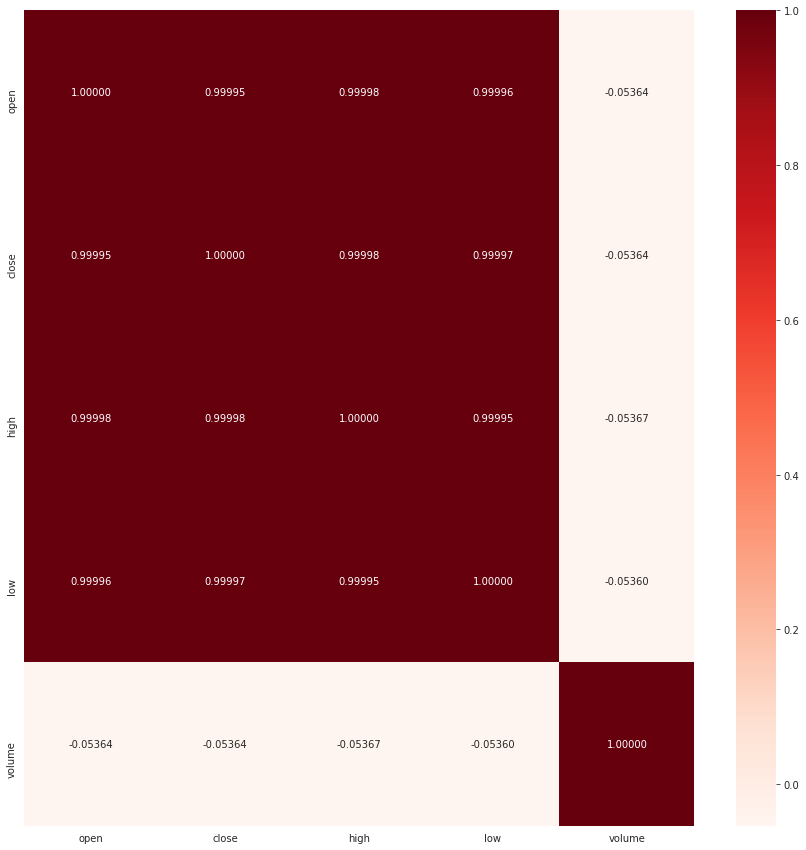

In [86]:
#Estudiando correlaciones entre variables
correlations = df.loc[:,'open':'volume'].corr()
plt.figure(figsize=(15,15))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds, fmt='.5f')
plt.show()
#print(correlations)

Como el coeficiente es proximo a 1 entre las variables de precio, esto nos indica que estan fuertamente correlacionadas y por el momento no aportaría información adicional considerarlas a todas. Resolvemos considerar las variables **"close"** y **"volume"** para las visualizaciones, ya que tradicionalmente se utiliza en el ambito financiero

Corroboramos esta conclusión obteniendo las medidas descriptivas de todas las variables en el período de interés.

In [87]:
#Definimos un nuevo dataset donde cada crypto activo representa una observacion y las variables son la media de cada variable original para ese crypto activo.
df_means =df.groupby(['cripto_activo']).agg({'open': ['mean'],'close': ['mean'], 'high': ['mean'],'low': ['mean'],'volume': ['mean']})
df_means.columns = ['_'.join(t) for t in df_means.columns]

df_means

open_mean    close_mean  ...      low_mean   volume_mean
cripto_activo                              ...                            
AAVEUSDT         249.990112    250.079483  ...    246.368881  1.189212e+04
ADAUSDT            0.670435      0.670863  ...      0.662029  2.654550e+07
BCHUSDT          515.765320    515.944763  ...    509.565338  1.326377e+04
BNBUSDT          188.906616    189.009857  ...    186.639587  1.630691e+05
BTCUSDT        37518.519531  37525.707031  ...  37239.492188  3.414171e+03
COMPUSDT         325.124908    325.236694  ...    320.988800  2.369627e+03
DASHUSDT         172.435593    172.491669  ...    170.299469  1.008950e+04
DOTUSDT           20.720516     20.728043  ...     20.469103  5.826821e+05
EOSUSDT            4.116489      4.117968  ...      4.064342  1.531676e+06
ETCUSDT           16.827322     16.845505  ...     16.534050  2.145679e+05
ETHUSDT         1417.009766   1417.653198  ...   1403.571411  4.700831e+04
LINKUSDT          23.273344     23.279409  ...     23.002716  3.771780e+05
LTCUSDT          160.082520    160.131714  ...    158.171661  7.066038e+04
MKRUSDT         1810.260864   1811.036865  ...   1786.744995  2.736172e+02
NEOUSDT           38.516521     38.532024  ...     37.991585  6.495198e+04
XMRUSDT          205.801636    205.848862  ...    203.734283  6.248919e+03

[16 rows x 5 columns]

In [88]:
#Obtenemos las medidas descriptivas de la distibucion de la media de cada variable
df_means.describe().round(2)

open_mean  close_mean  high_mean  low_mean  volume_mean
count      16.00       16.00      16.00     16.00        16.00
mean     2666.75     2667.33    2686.54   2645.52   1852803.11
std      9308.46     9310.23    9372.17   9239.47   6596211.29
min         0.67        0.67       0.68      0.66       273.62
25%        22.64       22.64      22.89     22.37      9129.35
50%       180.67      180.75     182.78    178.47     55980.14
75%       372.79      372.91     377.31    368.13    255220.43
max     37518.52    37525.71   37776.38  37239.49  26545503.92

## Medidas Descriptivas de las variables CLOSE y VOLUME para el periodo completo bajo estudio

In [89]:
#Medidas descriptivas por crypto activo para la columna close
df_descr_cl=df.groupby(['cripto_activo']).close.describe()
df_descr_cl

count          mean  ...           75%           max
cripto_activo                        ...                            
AAVEUSDT       5111.0    250.079849  ...    396.600998    617.349976
ADAUSDT        5111.0      0.670863  ...      1.190245      2.419700
BCHUSDT        5111.0    515.944946  ...    580.125000   1592.319946
BNBUSDT        5111.0    189.010010  ...    274.700760    684.219971
BTCUSDT        5111.0  37525.687500  ...  54822.775391  64577.261719
COMPUSDT       5111.0    325.236908  ...    469.020004    904.340027
DASHUSDT       5111.0    172.491714  ...    241.080002    463.089996
DOTUSDT        5111.0     20.728024  ...     35.505751     49.278999
EOSUSDT        5111.0      4.117967  ...      4.770050     14.516400
ETCUSDT        5111.0     16.845522  ...     14.035600    157.147003
ETHUSDT        5111.0   1417.651611  ...   1843.975037   4332.810059
LINKUSDT       5111.0     23.279428  ...     30.820650     52.269001
LTCUSDT        5111.0    160.131760  ...    207.635002    409.839996
MKRUSDT        5111.0   1811.038696  ...   2343.409912   6227.229980
NEOUSDT        5111.0     38.531948  ...     44.788500    139.500000
XMRUSDT        5111.0    205.848907  ...    237.029999    515.989990

[16 rows x 8 columns]

In [90]:
#Medidas descriptivas por crypto activo para la columna volume
df_descr_v=df.groupby(['cripto_activo']).volume.describe()
df_descr_v

count          mean  ...           75%           max
cripto_activo                        ...                            
AAVEUSDT       5111.0  1.189212e+04  ...  1.498278e+04  1.180567e+05
ADAUSDT        5111.0  2.654550e+07  ...  3.201090e+07  4.475996e+08
BCHUSDT        5111.0  1.326377e+04  ...  1.606562e+04  1.452233e+05
BNBUSDT        5111.0  1.630691e+05  ...  1.864751e+05  2.002899e+06
BTCUSDT        5111.0  3.414171e+03  ...  4.006839e+03  3.205777e+04
COMPUSDT       5111.0  2.369627e+03  ...  2.881483e+03  3.808458e+04
DASHUSDT       5111.0  1.008950e+04  ...  1.178801e+04  3.097176e+05
DOTUSDT        5111.0  5.826821e+05  ...  7.017585e+05  7.670054e+06
EOSUSDT        5111.0  1.531676e+06  ...  1.837239e+06  4.094906e+07
ETCUSDT        5111.0  2.145679e+05  ...  2.408672e+05  5.900847e+06
ETHUSDT        5111.0  4.700831e+04  ...  5.633915e+04  3.843013e+05
LINKUSDT       5111.0  3.771780e+05  ...  4.581365e+05  5.639549e+06
LTCUSDT        5111.0  7.066038e+04  ...  8.902417e+04  5.475810e+05
MKRUSDT        5111.0  2.736172e+02  ...  2.978771e+02  8.856377e+03
NEOUSDT        5111.0  6.495198e+04  ...  7.653471e+04  1.238562e+06
XMRUSDT        5111.0  6.248919e+03  ...  7.371237e+03  8.171499e+04

[16 rows x 8 columns]

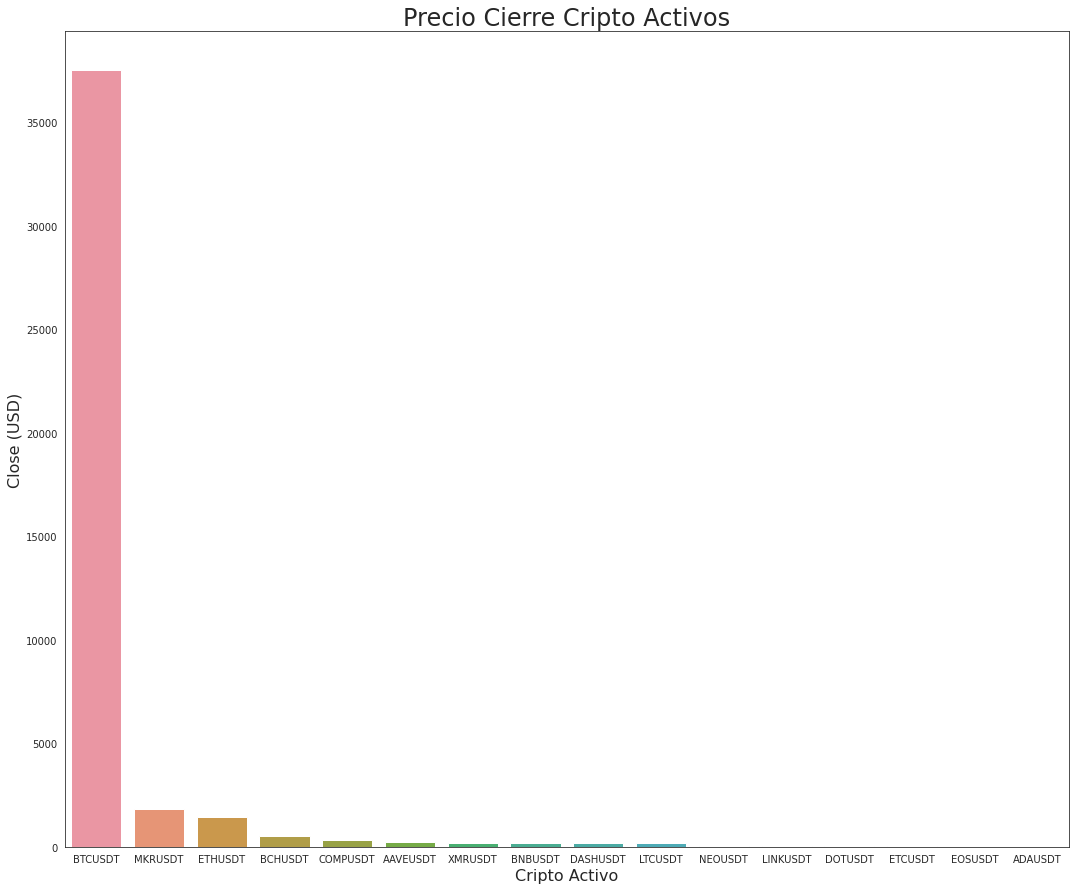

In [91]:
orden=list(df_descr_cl.sort_values(by='mean',ascending=False).index)
seaborn.set_style("white")
plt.figure(figsize=(18, 15))

#gráfico 
bar2 = seaborn.barplot(data=df,x="cripto_activo",  y="close", ci=None,order=orden)

plt.xlabel('Cripto Activo',fontdict= { 'fontsize': 16})
plt.ylabel('Close (USD)',fontdict= { 'fontsize': 16})
plt.title('Precio Cierre Cripto Activos',fontdict= { 'fontsize': 24}, y =1.0)
plt.show()

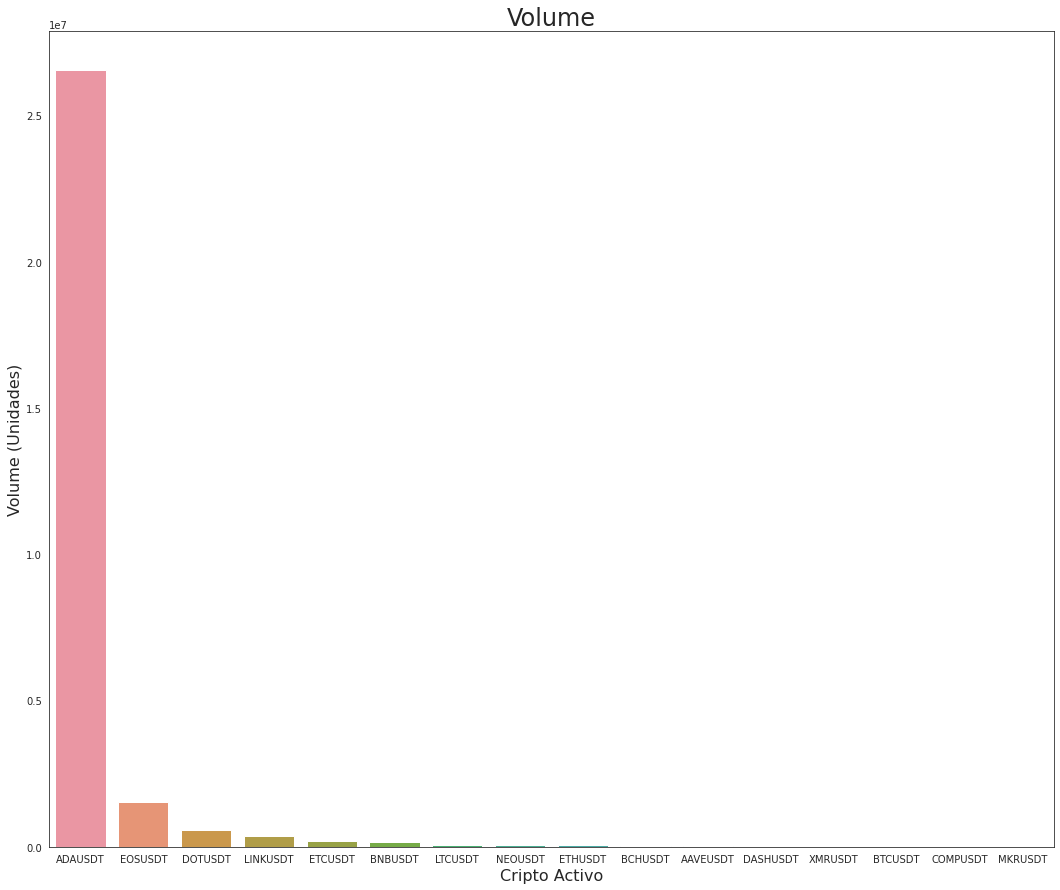

In [92]:
orden=list(df_descr_v.sort_values(by='mean',ascending=False).index)
seaborn.set_style("white")
plt.figure(figsize=(18, 15))

#gráfico 
bar2 = seaborn.barplot(data=df,x="cripto_activo",  y="volume", ci=None,order=orden)

plt.xlabel('Cripto Activo',fontdict= { 'fontsize': 16})
plt.ylabel('Volume (Unidades)',fontdict= { 'fontsize': 16})
plt.title('Volume',fontdict= { 'fontsize': 24}, y =1.0)
plt.show()

## **Diccionario CRIPTO ACTIVOS**
Para trabajar más comodamente se crea un diccionario que por cada llave (nombre de criptoactivo) tiene un dataframe con las observaciones correspondientes a cada cripto activo. (como alternativa se podria trabajar con un multiindex)

In [93]:
#Lista de CriptoActivos
cripto_list = list(df['cripto_activo'].unique())

#CREO UN DICCIONARIO VACÍO
df_dict = {}
contador=0
#Recorro la lista con cripto activos
for i in cripto_list:
  df_aux = df[df.cripto_activo == i]
  df_dict[i] = df_aux
  #EL DICCIONARIO GUARDA POR CLAVE VALOR CADA CRIPTO ACTIVO UN DATAFRAME CON SUS OBSERVACIONES
  
  
  #Impresion de 3 llaves del diccionario Resultado para observar
  if contador<3:
    print(i, df_dict[i])
    contador+=1


AAVEUSDT                            open       close        high  ...  Month  Week   Weekday
2020-10-15 03:00:00   51.430000   47.098999   59.000000  ...     10    42  Thursday
2020-10-15 04:00:00   47.097000   47.486000   47.916000  ...     10    42  Thursday
2020-10-15 05:00:00   47.429001   49.000000   49.745998  ...     10    42  Thursday
2020-10-15 06:00:00   49.000000   49.030998   49.495998  ...     10    42  Thursday
2020-10-15 07:00:00   49.150002   49.000000   49.208000  ...     10    42  Thursday
...                         ...         ...         ...  ...    ...   ...       ...
2021-05-16 11:00:00  559.210022  547.340027  560.559998  ...      5    19    Sunday
2021-05-16 12:00:00  547.400024  533.369995  551.179993  ...      5    19    Sunday
2021-05-16 13:00:00  533.119995  536.659973  537.989990  ...      5    19    Sunday
2021-05-16 14:00:00  536.659973  523.179993  541.039978  ...      5    19    Sunday
2021-05-16 15:00:00  523.179993  519.159973  524.200012  ...      5

## Histograma de activos

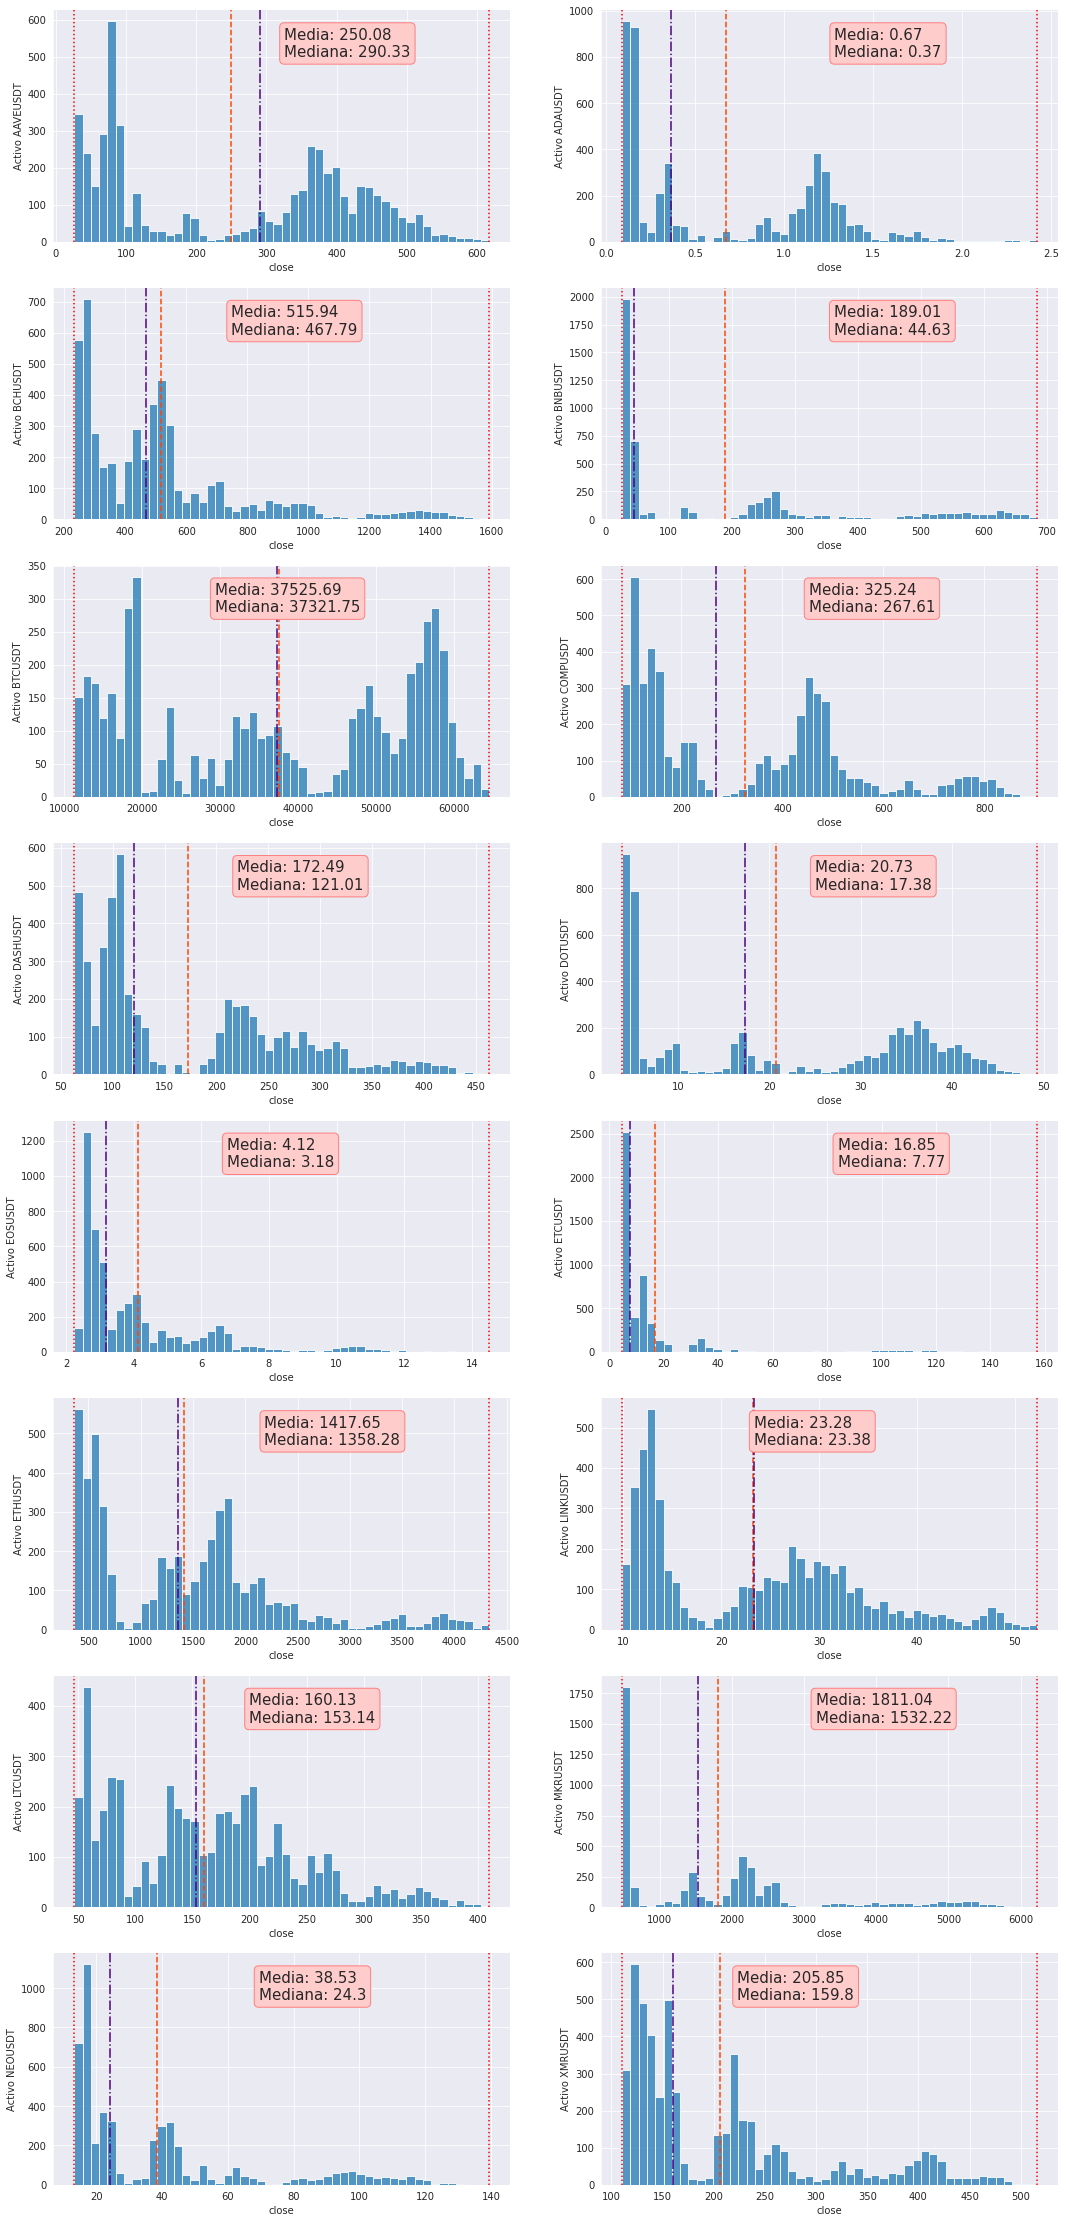

In [94]:

seaborn.set_style("darkgrid")
#Se va a confeccionar un histograma de la variable Close de cada criptoactivo
variable='close'

#Se Crean subplots para graficar ordenadamente
filas=int(len(cripto_list)/2)
f,axs=plt.subplots(filas,2,figsize=(18,5*filas))

#Se recorre la Lista de Activos y se grafica cada histograma
for cripto in cripto_list:
  indice=cripto_list.index(cripto) #Lugar del Activo en la lista            
  serie=df_dict[cripto][variable]
  axe=axs[int(indice/2)][indice%2]  

  #Grafico histogramaa
  seaborn.histplot(serie,bins=50,ax=axe)

  #Obtención de Parametros a Graficar 
  media_item=df_descr_cl.loc[cripto,'mean']
  mediana_item=df_descr_cl.loc[cripto,'50%']
  min_item=df_descr_cl.loc[cripto,'min']
  max_item=df_descr_cl.loc[cripto,'max']

  ref='Media: '+ str(round(media_item,2)) + '\nMediana: '+ str(round(mediana_item,2))

  axe.axvline(media_item, color='orangered',linestyle='--', label='Media')
  axe.axvline(mediana_item, color='indigo',linestyle='-.', label='Mediana')
  axe.axvline(min_item, color='red',
                linestyle='dotted', label='Minimo')
  axe.axvline(max_item, color='red',
                linestyle='dotted', label='Maximo')

  starty, endy= axe.get_ylim()
  startx, endx= axe.get_xlim()
  axe.text((endx-startx)*0.5,endy*0.8,ref,size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

  label= "Activo "+ cripto
  axe.set_ylabel(label)
seaborn.despine()

Observando las distribuciones de los criptoactivos se ve claramente que al ser serie temporales y variar en el tiempo, el tratamiento tiene que ser completamente distinto al que venimos acostumbrados, ya que se puede ver como cada distribucion es como una superposicion de distribuciones, se comportan como si fueran muchas poblaciones distintas superpuestas, ya que las distribuciones seguramente no se mantendran en el tiempo

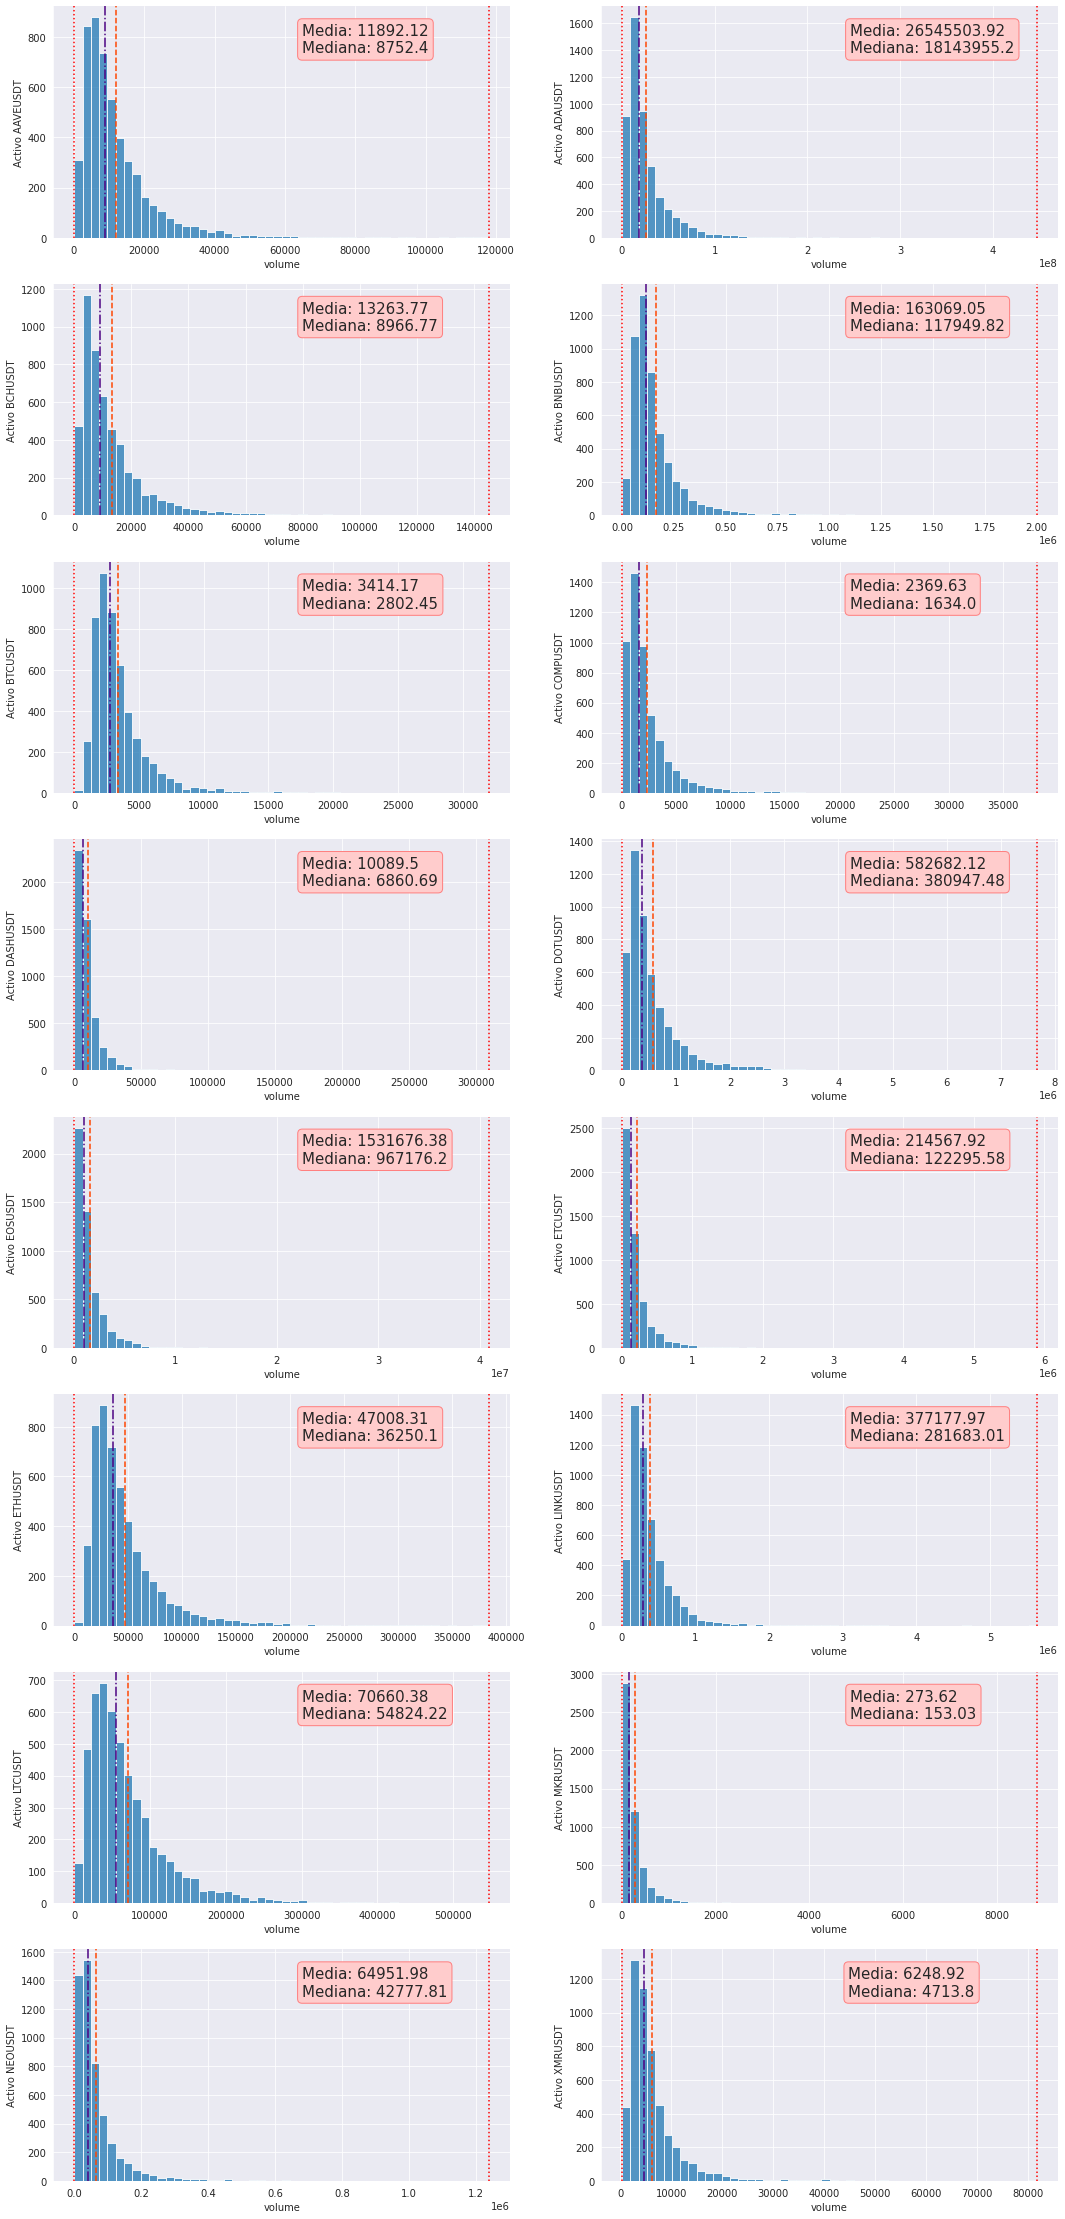

In [95]:
#Se va a confeccionar un histograma de la variable Close de cada criptoactivo
variable='volume'

#Se Crean subplots para graficar ordenadamente
filas=int(len(cripto_list)/2)
f,axs=plt.subplots(filas,2,figsize=(18,5*filas))

#Se recorre la Lista de Activos y se grafica cada histograma
for cripto in cripto_list:
  indice=cripto_list.index(cripto) #Lugar del Activo en la lista            
  serie=df_dict[cripto][variable]
  axe=axs[int(indice/2)][indice%2]  

  #Grafico histogramaa
  seaborn.histplot(serie,bins=50,ax=axe)

  #Obtención de Parametros a Graficar 
  media_item=df_descr_v.loc[cripto,'mean']
  mediana_item=df_descr_v.loc[cripto,'50%']
  min_item=df_descr_v.loc[cripto,'min']
  max_item=df_descr_v.loc[cripto,'max']

  ref='Media: '+ str(round(media_item,2)) + '\nMediana: '+ str(round(mediana_item,2))

  axe.axvline(media_item, color='orangered',linestyle='--', label='Media')
  axe.axvline(mediana_item, color='indigo',linestyle='-.', label='Mediana')
  axe.axvline(min_item, color='red',
                linestyle='dotted', label='Minimo')
  axe.axvline(max_item, color='red',
                linestyle='dotted', label='Maximo')

  starty, endy= axe.get_ylim()
  startx, endx= axe.get_xlim()
  axe.text((endx-startx)*0.5,endy*0.8,ref,size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

  label= "Activo "+ cripto
  axe.set_ylabel(label)

seaborn.despine()

La variable **'volume'**, tiene otro comportamiento distinto a la variable **'close'**, ya que pareciera tener una distribucion de Poisson con lambda pequeño

##**Diccionario de MEDIDAS DESCRIPTIVAS MÓVILES**

Viendo que al ser series temporales y las distribuciones no se mantniene constantes en el tiempo, será util hacer analisis de estadisticos moviles.
Obtendremos por cada crypto activo la media móvil, la desviación estándar móvil  y coeficiente de variación móvil del precio de cierre, y crearemos un segundo diccionario con estas medidas descriptivas.

In [96]:
#CREO UN DICCIONARIO VACÍO
mobile_mean_std_dict = {}
contador=0

for i in cripto_list:
  #obtenemos el dataframe de cada moneda del diccionario nº1, en le cual la frecuencia de las observaciones es H.
  df_data= df_dict[i]
  
  # Creamos un dataframe para guardar las medidas de la moneda en estudio 
  df_aux = pd.DataFrame(columns=['mobile_mean', 'mobile_std', 'coef_va'])
  
  # calculamos las medidas para un periodo de 1 dia (rolling(24)
  df_mean=df_data.close.rolling(24).mean()
  df_std=df_data.close.rolling(24).std()
  df_coefv=np.divide(df_std,df_mean)
  #concatenacion vertical
  df_aux=pd.concat([df_mean, df_std,df_coefv], axis=1)
  
  #Aplicamos al dataframe auxiliar la frecuencia '6h' y quitamos las filas NaN que se generan para la hora inicial, 
  # en la cual el valor de las medidas móviles es NaN por que NO hay periodo anterior con el cual hacer el cálculo
  df_aux= df_aux.asfreq(freq='6h')
  df_aux= df_aux.dropna()
  #guardamos el dataframe con las medidas de la moneda en estudio en el 2º diccionario
  mobile_mean_std_dict[i] = df_aux

  mobile_mean_std_dict[i].columns=['close_mobile_mean', 'close_mobile_std', 'close_coef_va']

#EL DICCIONARIO GUARDA POR CLAVE VALOR LA MEDIA MOVIL DE CADA CRIPTO
  if contador<3:
    print(i, mobile_mean_std_dict[i])
    contador+=1

AAVEUSDT                      close_mobile_mean  close_mobile_std  close_coef_va
2020-10-16 03:00:00          46.294708          1.891043       0.040848
2020-10-16 09:00:00          44.703167          2.212992       0.049504
2020-10-16 15:00:00          43.492125          2.159409       0.049651
2020-10-16 21:00:00          42.004833          1.281254       0.030503
2020-10-17 03:00:00          41.030042          1.012107       0.024667
...                                ...               ...            ...
2021-05-15 15:00:00         579.131668         16.702054       0.028840
2021-05-15 21:00:00         563.705419         21.594417       0.038308
2021-05-16 03:00:00         549.598338         18.991373       0.034555
2021-05-16 09:00:00         543.078336         14.511126       0.026720
2021-05-16 15:00:00         536.673335         11.148440       0.020773

[848 rows x 3 columns]
ADAUSDT                      close_mobile_mean  close_mobile_std  close_coef_va
2020-10-16 03:00:00    

In [97]:
#CREO UN DICCIONARIO VACÍO
mobile_mean_std_dict_v = {}
contador=0

for i in cripto_list:
  #obtenemos el dataframe de cada moneda del diccionario nº1, en le cual la frecuencia de las observaciones es H.
  df_data= df_dict[i]
  
  # Creamos un dataframe para guardar las medidas de la moneda en estudio 
  df_aux = pd.DataFrame(columns=['mobile_mean', 'mobile_std', 'coef_va'])
  
  # calculamos las medidas para un periodo de 1 dia (rolling(24)
  df_mean=df_data.volume.rolling(24).mean()
  df_std=df_data.volume.rolling(24).std()
  df_coefv=np.divide(df_std,df_mean)
  #concatenacion vertical
  df_aux=pd.concat([df_mean, df_std,df_coefv], axis=1)
  
  #Aplicamos al dataframe auxiliar la frecuencia '6h' y quitamos las filas NaN que se generan para la hora inicial, 
  # en la cual el valor de las medidas móviles es NaN por que NO hay periodo anterior con el cual hacer el cálculo
  df_aux= df_aux.asfreq(freq='6h')
  df_aux= df_aux.dropna()
  #guardamos el dataframe con las medidas de la moneda en estudio en el 2º diccionario
  mobile_mean_std_dict_v[i] = df_aux

  mobile_mean_std_dict_v[i].columns=['volume_mobile_mean', 'volume_mobile_std', 'volume_coef_va']
#EL DICCIONARIO GUARDA POR CLAVE VALOR LA MEDIA MOVIL DE CADA CRIPTO
  if contador<3:
    print(i, mobile_mean_std_dict_v[i])
    contador+=1

AAVEUSDT                      volume_mobile_mean  volume_mobile_std  volume_coef_va
2020-10-16 03:00:00         4782.765000        3535.637212        0.739245
2020-10-16 09:00:00         5139.534417        3790.538474        0.737526
2020-10-16 15:00:00         4321.055833        3826.727019        0.885600
2020-10-16 21:00:00         4322.120792        3838.611130        0.888131
2020-10-17 03:00:00         3169.852583        2465.540562        0.777809
...                                 ...                ...             ...
2021-05-15 15:00:00        13414.654833        5488.639759        0.409153
2021-05-15 21:00:00        13990.976767        7178.939254        0.513112
2021-05-16 03:00:00        14277.319117        7263.844715        0.508768
2021-05-16 09:00:00        12631.616133        6922.013507        0.547991
2021-05-16 15:00:00        12323.327979        7098.223586        0.575999

[848 rows x 3 columns]
ADAUSDT                      volume_mobile_mean  volume_mobile_std 

In [98]:
dict_movil={}
for i in cripto_list:
  dict_movil[i]=pd.concat([mobile_mean_std_dict[i],mobile_mean_std_dict_v[i]],axis=1)
  dict_movil[i]['Year'] = dict_movil[i].index.year
  dict_movil[i]['Month'] = dict_movil[i].index.month
  dict_movil[i]['Week'] = dict_movil[i].index.week
  dict_movil[i]['Weekday']=dict_movil[i].index.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


#**4) Análisis OUTLIERS y ESTACIONALIDAD de Bloxpots en diferentes períodos para un activo determinado.**

Elegimos para nuestro estudio el activo "**BTCUSDT**", por lo definimos  un nuevo dataframe "df_bloxplot" con esa moneda del diccionario.

In [99]:
df_bloxplot=df_dict['BTCUSDT']
df_bloxplot[:3]

open         close  ...  Week   Weekday
2020-10-15 03:00:00  11361.580078  11378.959961  ...    42  Thursday
2020-10-15 04:00:00  11378.959961  11388.730469  ...    42  Thursday
2020-10-15 05:00:00  11388.730469  11403.950195  ...    42  Thursday

[3 rows x 10 columns]

In [130]:
#df_seasonality= df_dict['BTCUSDT']
#df_seasonality[:3]
df_seasonality=df_sinfiltro[df_sinfiltro['cripto_activo']=='BTCUSDT']
df_seasonality[:3]

open     close  ...      volume  cripto_activo
2018-01-01 00:00:00  13715.65  13529.01  ...  443.356199        BTCUSDT
2018-01-01 01:00:00  13528.99  13203.06  ...  383.697006        BTCUSDT
2018-01-01 02:00:00  13203.00  13330.18  ...  429.064572        BTCUSDT

[3 rows x 6 columns]

In [131]:
 
# calculamos las medidas para un periodo de 1 dia (rolling(24)
df_meanrm=df_seasonality.close.rolling(24).mean()
df_meanrm=df_meanrm.asfreq(freq='M')
df_meanrm=df_meanrm.dropna()
df_meanrm=df_meanrm.reset_index()
df_meanrm=df_meanrm.set_index(['index'])
df_meanrm.columns=['mean_close_mensual']
df_meanrm['Year'] = df_meanrm.index.year
#df_meanrm.shape
df_meanrm[:3]
#df_meanr

mean_close_mensual  Year
index                               
2018-01-31        10667.578750  2018
2018-02-28        10567.887083  2018
2018-03-31         6906.937500  2018

In [147]:
# calculamos las medidas para un periodo de 1 dia (rolling(24)
df_meanra=df_seasonality.close.rolling(24).mean()
df_meanra=df_meanra.asfreq(freq='Y')
df_meanra=df_meanra.dropna()
df_meanra=df_meanra.reset_index()
df_meanra=df_meanra.set_index(['index'])
df_meanra.columns=['mean_close_anual']
df_meanra['Year'] = df_meanra.index.year
df_meanra
#df_meanr

mean_close_anual  Year
index                             
2018-12-31       3767.232500  2018
2019-12-31       7308.824583  2019
2020-12-31      28239.379583  2020

In [155]:

for i in list(df_meanra['Year'].unique()):
    media_anual=float(df_meanra[(df_meanrm['Year']==i)]['mean_close_anual'])
    df_aux= df_meanrm[(df_meanrm['Year']==int(i))]
    df_aux['mean_close_mensual/media']=df_aux['mean_close_mensual'].div(media_anual)
    print(df_aux['mean_close_mensual/media'])
    df_meanrm.loc[i,'mean_close_mensual']=list(df_aux['mean_close_mensual/media'])  #####LA MUERTE VERRR
    print(df_meanrm[(df_meanrm['Year']==int(i))]['mean_close_mensual'])
    #df_meanrm[(df_meanrm['Year']==int(i))]['mean_close_mensual']=df_meanrm[(df_meanrm['Year']==int(i))]['mean_close_mensual'].div(media_anual)

#print(df_meanrm[(df_meanrm['Year']==2018)]['mean_close_mensual'])
df_meanrm

index
2018-01-31    2.831675
2018-02-28    2.805212
2018-03-31    1.833425
2018-04-30    2.486252
2018-05-31    1.970574
2018-06-30    1.574227
2018-07-31    2.161127
2018-08-31    1.837949
2018-09-30    1.741290
2018-10-31    1.685913
2018-11-30    1.131920
2018-12-31    1.000000
Name: mean_close_mensual/media, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


TypeError: ignored

### **4.1 BTCUSDT Boxplot Distribución por Mes**

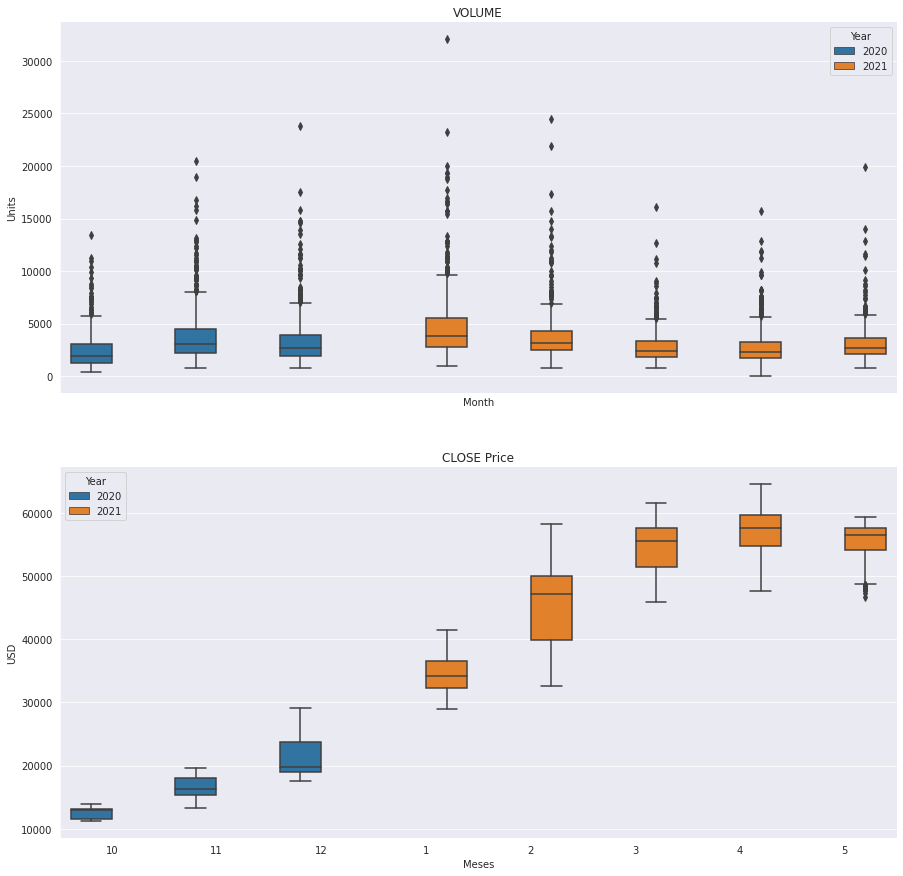

In [104]:
#COn todos los datos cada una hora

orden_months=[10,11,12,1,2,3,4,5]

fig, ejes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
for name, eje in zip(['volume','close'], ejes):
    seaborn.boxplot(data=df_bloxplot, x='Month',hue='Year',y=name,ax=eje, order= orden_months)

    if name!='volume':
       eje.set_xlabel('')
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())    
    plt.xlabel('Meses')
seaborn.set_style("darkgrid")
seaborn.despine()

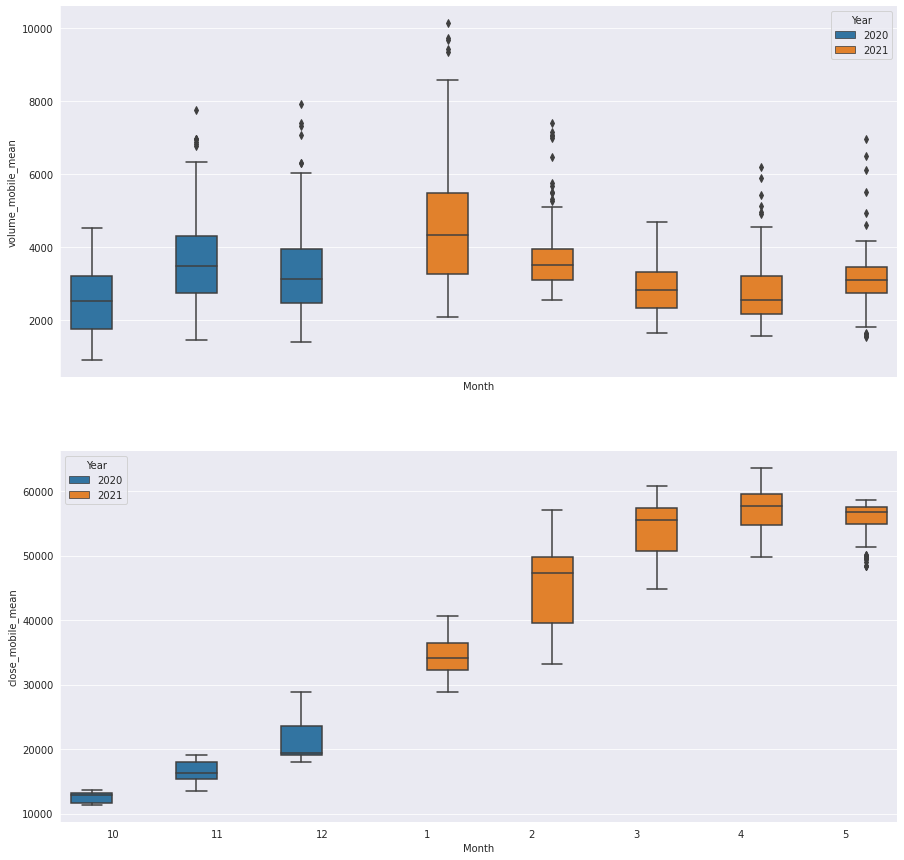

In [105]:
#Medias moviles diarias cada 6 horas
orden_months=[10,11,12,1,2,3,4,5]
dfgraf=dict_movil['BTCUSDT']



fig, ejes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
seaborn.boxplot(data=dfgraf, x='Month',hue='Year',y='volume_mobile_mean' ,ax=ejes[0], order= orden_months)
seaborn.boxplot(data=dfgraf, x='Month',hue='Year',y='close_mobile_mean' ,ax=ejes[1], order= orden_months)

seaborn.set_style("darkgrid")
seaborn.despine()

Podemos observar que la distribución mensual de las variables relativas a precio del cripto activo (open, close, high y low) se mantienen en constante crecimiento, siguiendo todas ellas una curva similar. No se observan valores outliers exceptuando el mes de Mayo del presente año. La caja con mayor variacion entre sus percentiles (la más alta) es la del mes de Febrero de 2021.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos altas y bajas pero la mediana nunca supera las 5 mil unidades. La caja con mayor variacion entre sus percentiles (la más alta) es la del mes de Enero de 2021. Observamos también que existen muchos valores outliers.

### **4.2 BTCUSDT Boxplot Distribución por Semana**

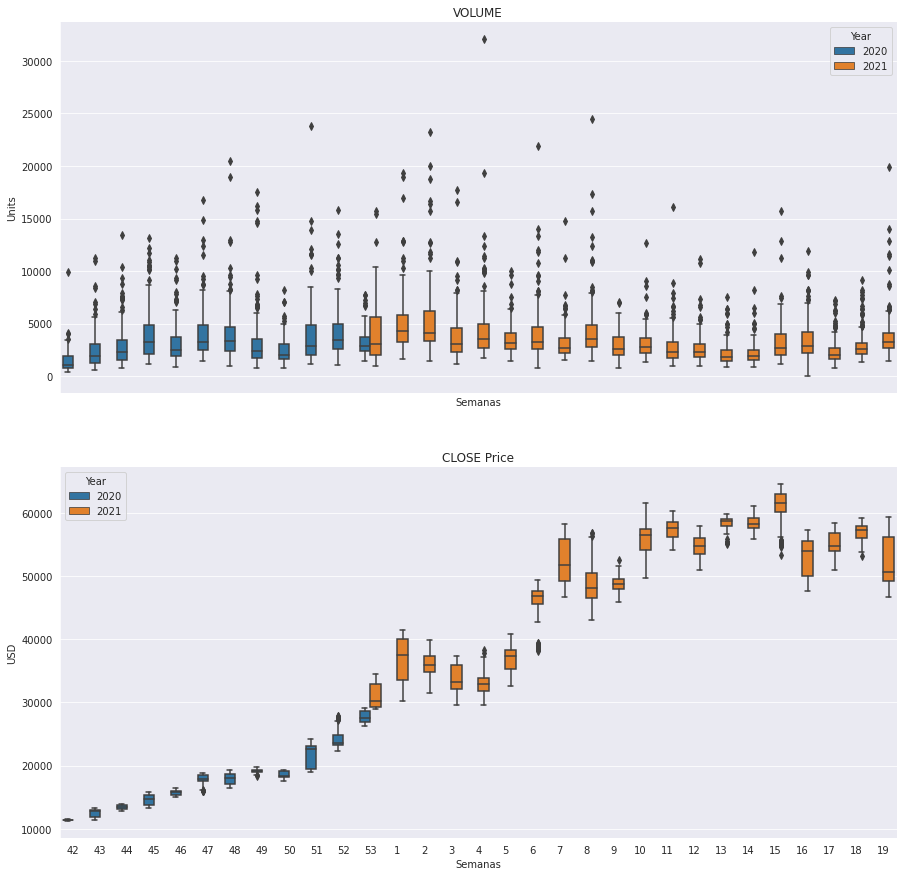

In [106]:
orden_weeks=[42,43,44,45,46,47,48,49,50,51,52,53,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

fig, ejes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
for name, eje in zip(['volume','close'], ejes):
    seaborn.boxplot(data=df_bloxplot, x='Week',hue='Year',y=name,ax=eje, order= orden_weeks)
    eje.set_xlabel('Semanas')
    if name!='volume':
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())   
    

seaborn.set_style("darkgrid")
seaborn.despine()


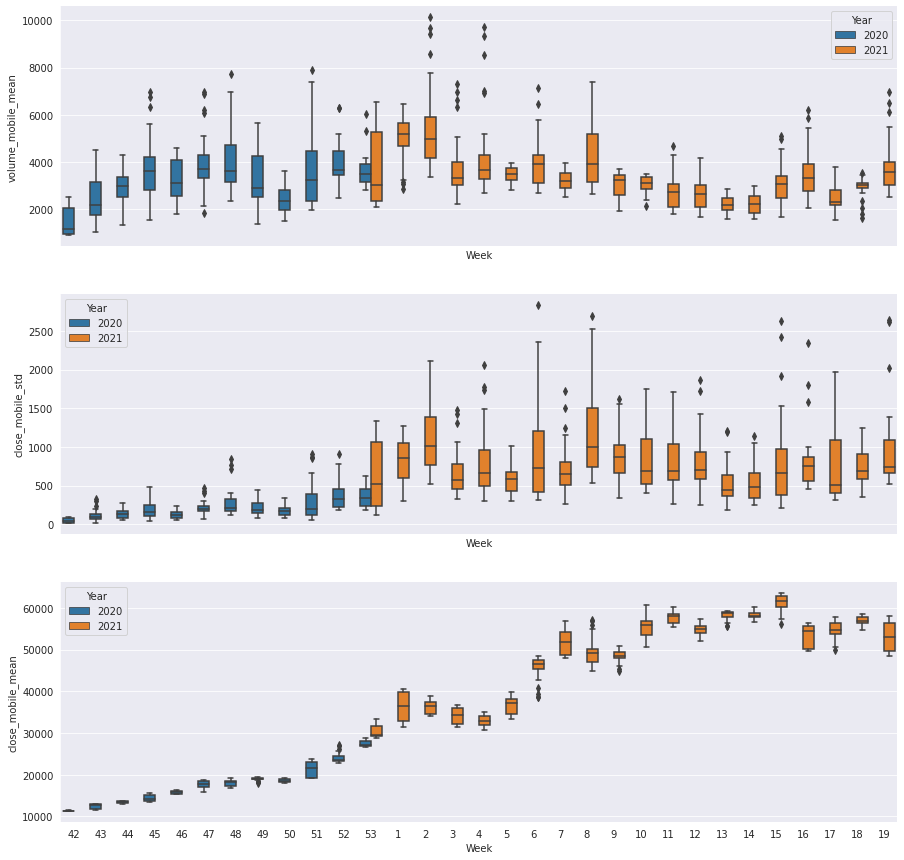

In [107]:
#Medias moviles diarias cada 6 horas

orden_weeks=[42,43,44,45,46,47,48,49,50,51,52,53,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
dfgraf=dict_movil['BTCUSDT']



fig, ejes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
seaborn.boxplot(data=dfgraf, x='Week',hue='Year',y='volume_mobile_mean' ,ax=ejes[0], order= orden_weeks)
seaborn.boxplot(data=dfgraf, x='Week',hue='Year',y='close_mobile_std' ,ax=ejes[1], order= orden_weeks)
seaborn.boxplot(data=dfgraf, x='Week',hue='Year',y='close_mobile_mean' ,ax=ejes[2], order= orden_weeks)
seaborn.set_style("darkgrid")
seaborn.despine()

Nuevamente, con el periodo semanal, podemos observar que la distribución de las variables relativas a precio del cripto activo (open, close, high y low), no se mantienen en el tiempo y se muestran en constante crecimiento, siguiendo todas ellas una curva similar. 
En este caso podemos observar varias semanas con outliers, destacándose los outliers con tendencia bajista en las semanas 7 y 15. 
Las cajas con mayor variacion entre sus percentiles (la más altas) son en las semanas 2,8,17 y 20 del presente año 2021.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos nuevamente que existen muchos valores outliers y que las semanas cuya mediana estuvo más cercana a las 5000 unidades fueron la primer y segunda semana del 2021.

###**4.3 BTCUSDT Boxplot Distribución por día de la semana**

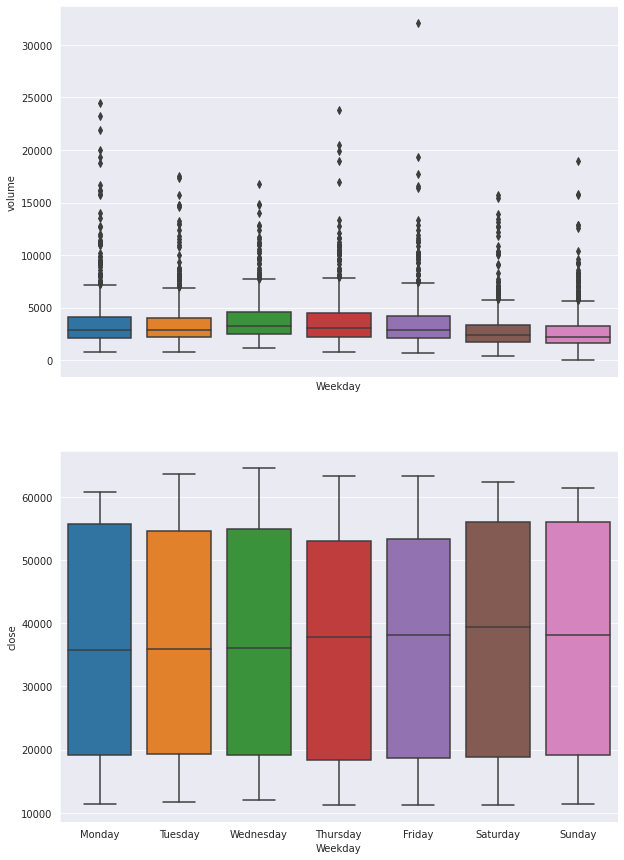

In [108]:
periodo='Weekday'
variables=['volume','close']
orden=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 15), sharex=True)
for variable, ax in zip(variables, axes):
  seaborn.boxplot(data=df_bloxplot, x=periodo, y=variable, ax=ax, order=orden
                  )
  ax.set_ylabel(variable)

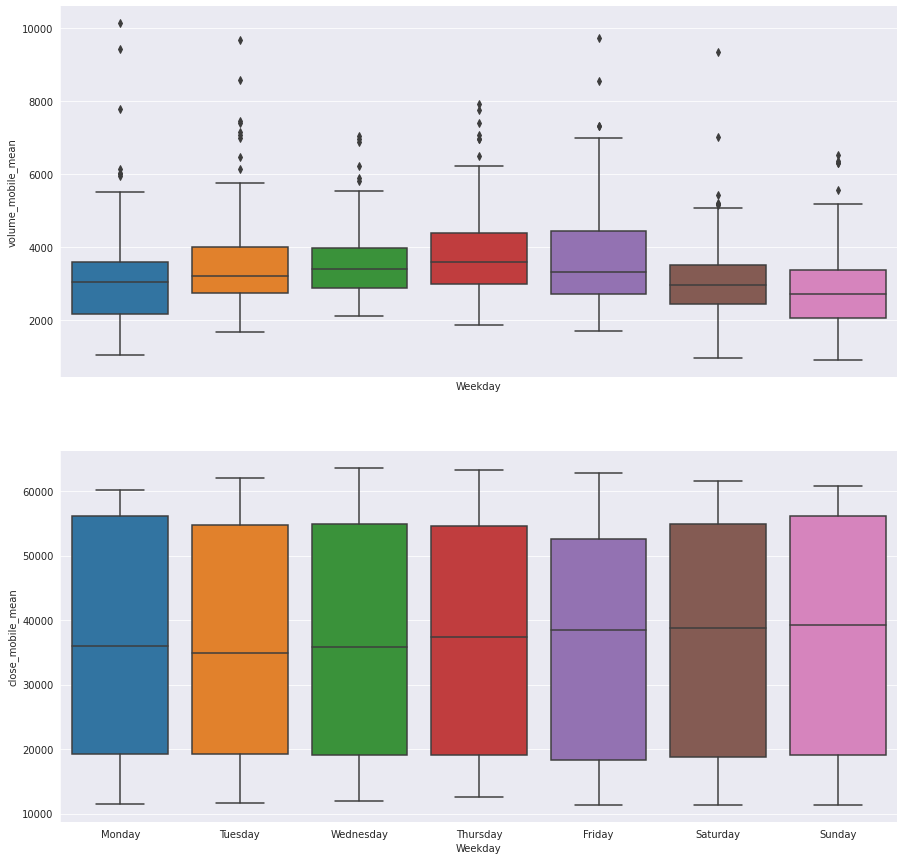

In [109]:
#Medias moviles diarias cada 6 horas

orden=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dfgraf=dict_movil['BTCUSDT']



fig, ejes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
seaborn.boxplot(data=dfgraf, x='Weekday',y='volume_mobile_mean' ,ax=ejes[0], order= orden)
seaborn.boxplot(data=dfgraf, x='Weekday',y='close_mobile_mean' ,ax=ejes[1], order= orden)

seaborn.set_style("darkgrid")
seaborn.despine()

Desde la perspectiva de los días de semana, podemos observar que la distribución de las variables relativas a precio del cripto activo (open, close, high y low) muestra un patrón de crecimiento del lunes al miercoles, cuando alcanza su pico del valor máximo, y luego decrece hacia el domingo. No se observan outliers, pero se observa una gran dispersión.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos que presenta una mayor variación a mitad de semana, los días miercoles y jueves se presentan los mayores volumenes transaccionados (sus cajas son mas altas y sus máximos se aproximan más a las 10000 unidades). Por otro lado, los días con menor variación son los Sábados y Domingos (sus cajas son más angostas y tanto sus máximos como mínimos son menores en comparación a los demas días de la semana).



En general, se ve que las distribuciones de las variables referidas a **precios** no se mantienen constantes en el tiempo, en la variable **volume** se nota tal vez una estacionalidad por mes, semana y dia de la semana. Se nota la prescencia de outliers en la variable **'volume'**, por lo tanto se hizo tambien un analisis de media movil estos outliers pasan un poco más desapercividos.

#5) Análisis de la evolución temporal de los activos.

Vamos a graficar el porcentaje de variación del precio de cierre del activo respecto al primer dia del periodo de interes, para poder observar la evolucion temporal de todos los activos en el mismo grafico

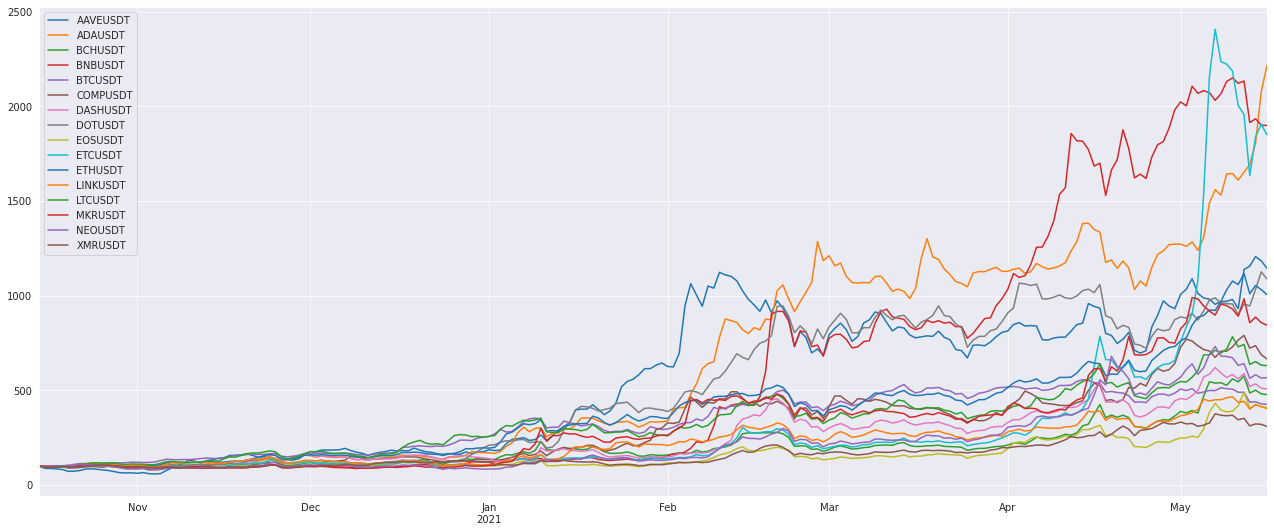

In [110]:
# Porcentaje de variacion diario respecto al comienzo del periodo
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)

for cripto in criptoactivos:
  close_aux= df_dict[cripto]['close']

  close_normalizado=close_aux.div(close_aux.iloc[0]).mul(100)
 
  close_normalizado=close_normalizado.resample('D').mean()
  close_normalizado.plot()
  
plt.legend(criptoactivos)
plt.show()

In [111]:
#Data Frame con variable Close
df_close= df.pivot(columns='cripto_activo',
 values='close')
#Data Frame con variable Volume
df_volume= df.pivot(columns='cripto_activo',
 values='volume')


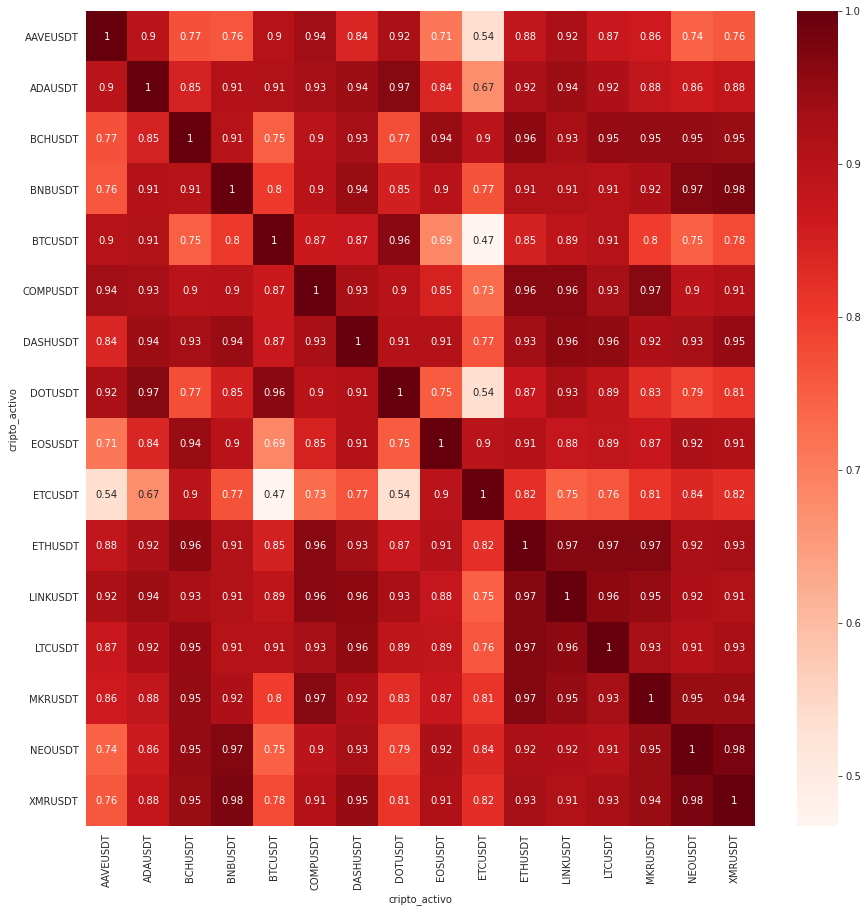

In [112]:
#Estudiando correlaciones entre criptos para la variable close
corre = df_close.corr()
#Using Pearson Correlation
plt.figure(figsize=(15,15))

seaborn.heatmap(corre, annot=True, cmap=plt.cm.Reds)
plt.show()

 ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? ¿Los activos tienden a moverse en forma conjunta? En caso de que existan crisis, ¿son globales o individuales?

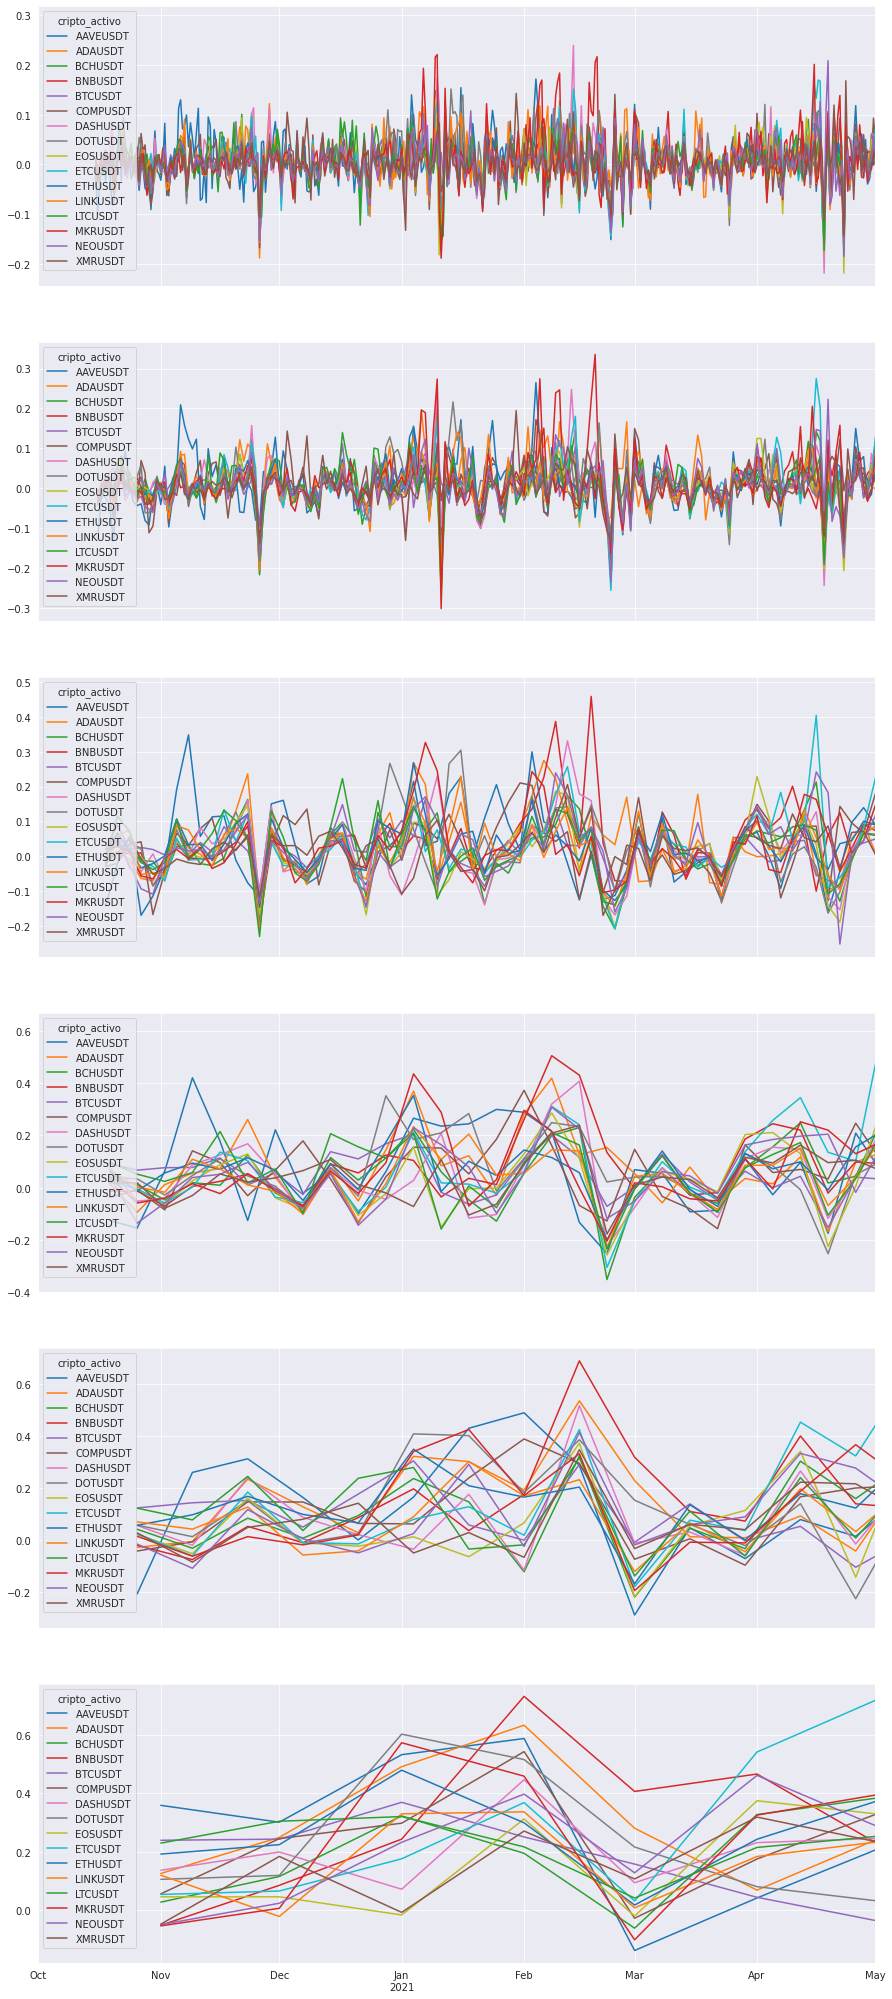

In [113]:
##RENDIMIENTO MOVIL EN DISTINTOS PERIODOS
periodo=['12h','D','3D','W','2W','M']
fig, axes = plt.subplots(len(periodo), 1, figsize=(15, 6*len(periodo)), sharex=True)
for i in periodo:
  indice=periodo.index(i)
  df_peri=df_close.resample(i).mean()
  df_crisis= (df_peri-df_peri.shift(1))/df_peri  #CALCULO DE RENDIMIENTO
  df_crisis.plot(ax=axes[indice])

Graficando para cada activo la diferencia de precio con respecto a un periodo anterior (estudiando para 4 casos 12h, Dia, Semana, Mes) Se observa una tendencia a moverse en forma conjunta con algunos despegues de algunos. Se observa respecto al precio de los activos, periodos de crisis tanto globales como individuales.
Se destacan haciendo el analisis diario 5 periodos de crisis muy marcados.

En el analisis mensual se observa una crisis globa muy marcada en el periodo Febrero-Marzo.
En Diciembre-Enero se ve uno un poco más individual para unos 3 activos

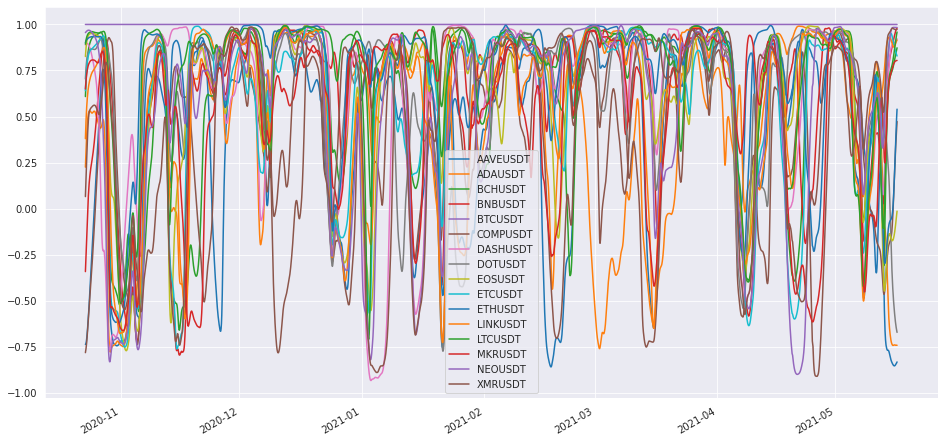

In [114]:
#GRAFICO DE CORRELACIONES DE CRIPTO ACTIVOS FRENTE AL BITCOIN, de medias moviles diarias, y ventada correlacion por semana (24*7)
serie_BTCUSDT=df_close['BTCUSDT'].rolling(24).mean() #Serie de medias moviles bitcoin 
import matplotlib.dates as mdates
for cripto in cripto_list:
  serie_cripto=df_close[cripto].rolling(24).mean() #Serie de medias moviles otro cripto
  serie_corr=serie_cripto.rolling(24*7).corr(serie_BTCUSDT) #Serie de correlaciones con ventana de 24*7

  
  #Grafico 
  #print(serie_corr)
  serie_corr.plot(figsize=(16,8))
  #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
  #plt.hlines(0,start,end, color= 'r')
plt.legend(cripto_list)

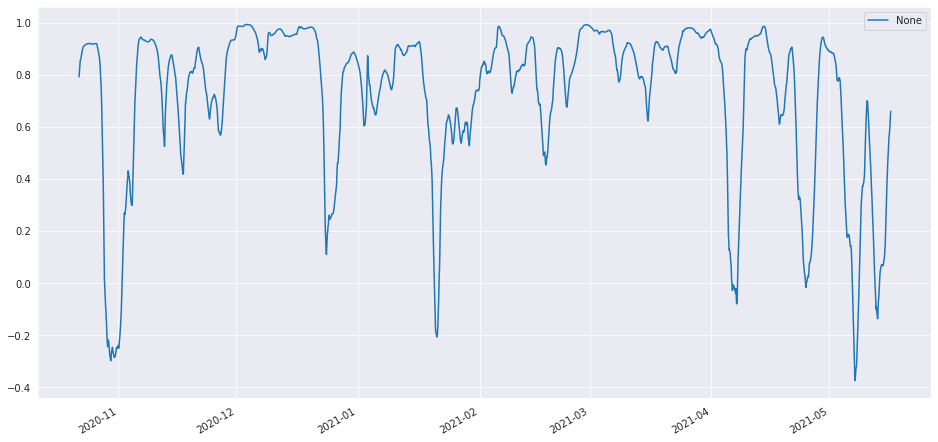

In [115]:
#df.rolling(20).corr(GLD_sem)['Log_Ret'].plot(figsize=(16,8))
BTCUSDT=df_close['BTCUSDT'].rolling(24*7)
df_close['ETHUSDT'].rolling(24*7).corr(BTCUSDT).plot(figsize=(16,8))
  #plt.hlines(0,start,end, color= 'r')
plt.legend()

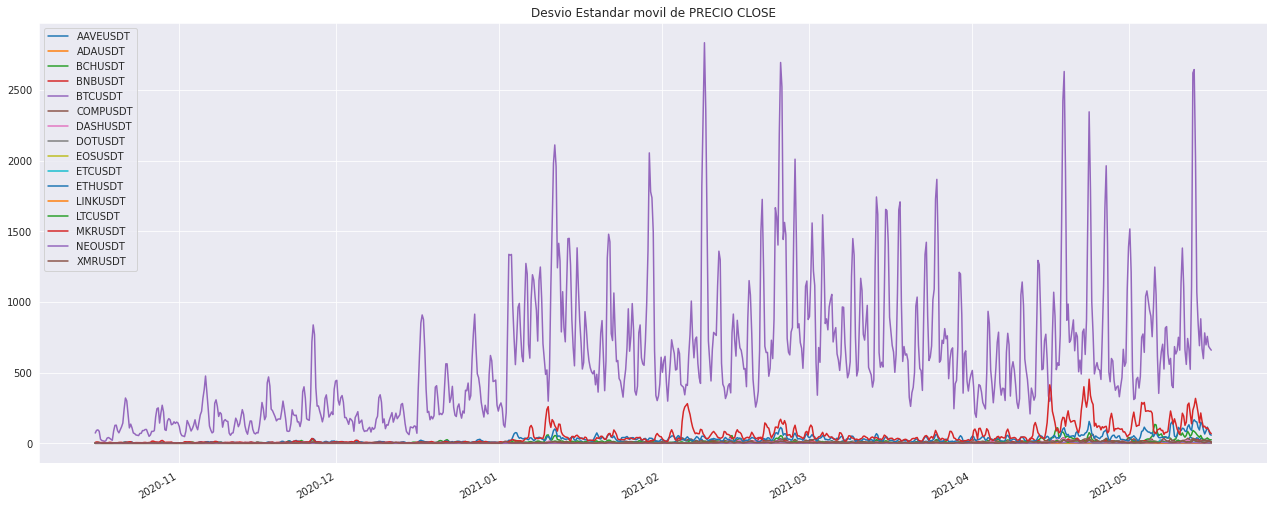

In [116]:
##Desvio Estandar Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)
for cripto in criptoactivos:
  mobile_mean_std_dict[cripto]['close_mobile_std'].plot()
plt.title('Desvio Estandar movil de PRECIO CLOSE')
plt.legend(criptoactivos)
plt.show()

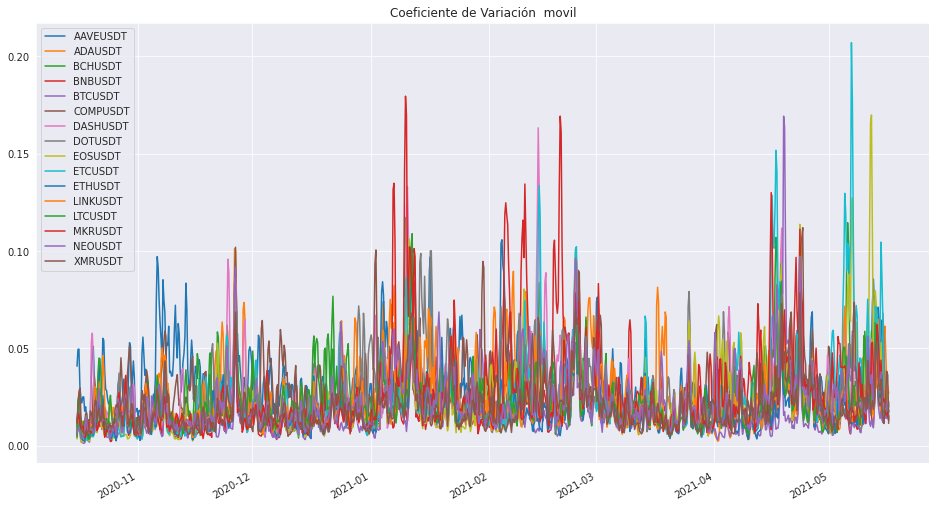

In [117]:
# Coeficiente de Variacion Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(16, 9), sharex=True)
for cripto in criptoactivos:
  mobile_mean_std_dict[cripto]['close_coef_va'].plot()
plt.legend(criptoactivos)
plt.title('Coeficiente de Variación  movil')
plt.show()

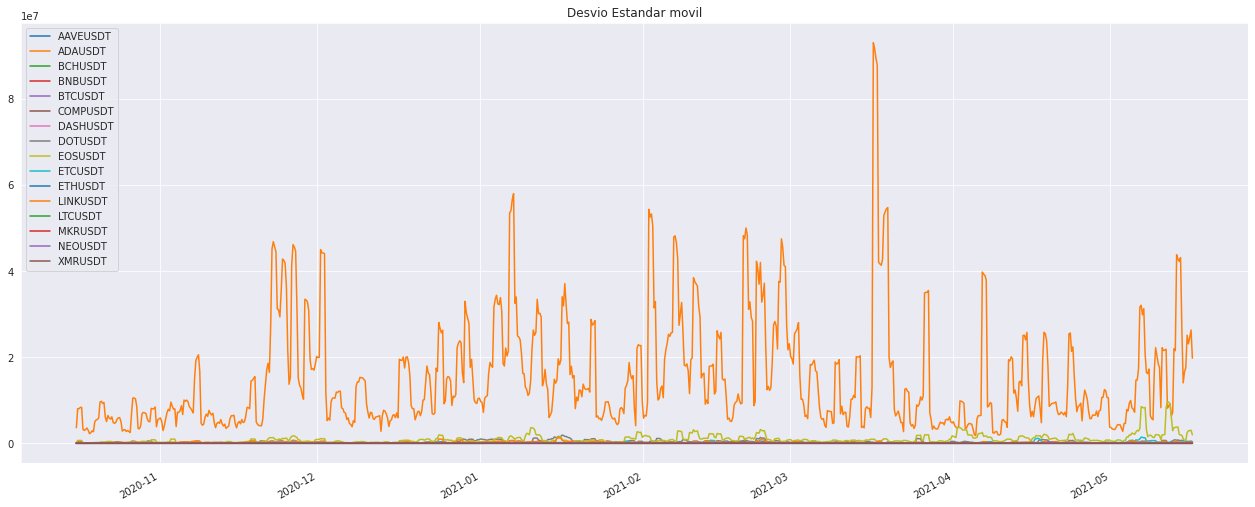

In [118]:
##Desvio Estandar VOLUMEN Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)
for cripto in criptoactivos:
  dict_movil[cripto]['volume_mobile_std'].plot()
plt.title('Desvio Estandar movil')
plt.legend(criptoactivos)
plt.show()

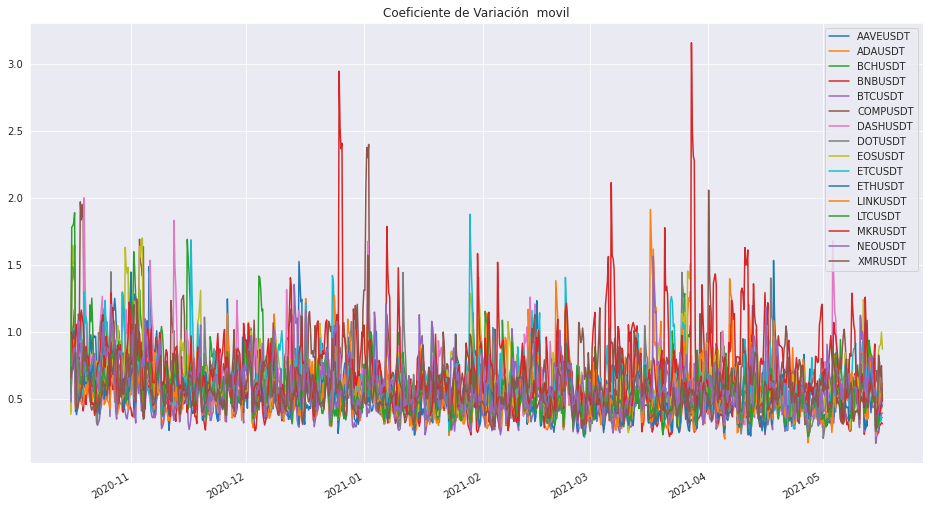

In [119]:
# Coeficiente de Variacion Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(16, 9), sharex=True)
for cripto in criptoactivos:
  dict_movil[cripto]['volume_coef_va'].plot()
plt.legend(criptoactivos)
plt.title('Coeficiente de Variación  movil')
plt.show()

Analizando los graficos anteriores, podemos ver:
-Que liquidez no implica volumen operado ni cotizacion o precio de la moneda
-Bitcoin es el cripto activo con mayor volatilidad
-Existen periodos de alta correlacion entre los cripto, lo que implica un movimiento conjunto en sus precios, pero periodos en donde se separan y hasta su correlacion es inversa.
-

# PARTE II - RESPUESTAS

##1) Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


In [120]:
#Diccionario con cambios porcentuales respecto al valor anterior (Tasa de rendimiento simple)
df_tasasimple=df_close.pct_change()
df_tasasimple.head(3)

cripto_activo        AAVEUSDT   ADAUSDT   BCHUSDT  ...   MKRUSDT   NEOUSDT   XMRUSDT
2020-10-15 03:00:00       NaN       NaN       NaN  ...       NaN       NaN       NaN
2020-10-15 04:00:00  0.008217  0.006546  0.002683  ...  0.007415  0.004327  0.003455
2020-10-15 05:00:00  0.031883  0.005373  0.019005  ...  0.008537  0.002795  0.003365

[3 rows x 16 columns]

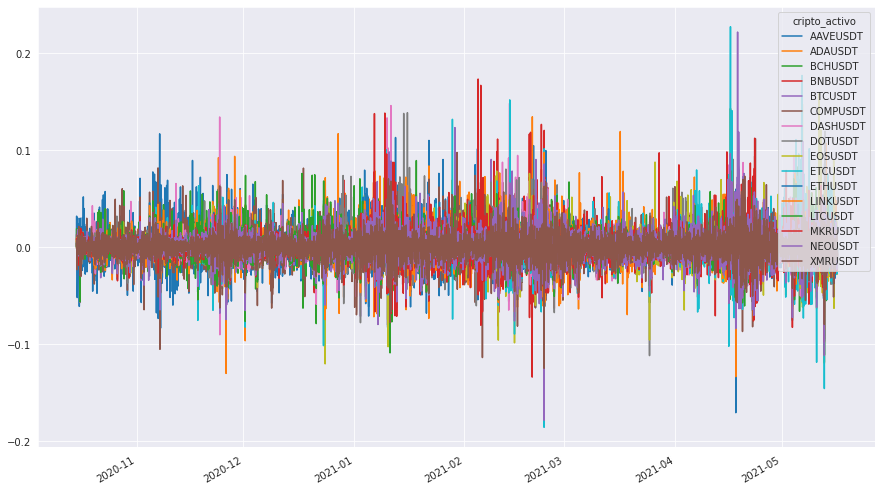

In [121]:
#Evolucion temporal de la tasa de rendimiento simple

fig, axes = plt.subplots(1, 1, figsize=(15, 9), sharex=True)
df_tasasimple.plot(ax=axes)

In [122]:
#calculando el retorno logarítmico
# df['pct_change_close'] = df.close.pct_change()
# df['log_ret'] = np.log(df.close) - np.log(df.close.shift(1))
df_tasalog= np.log(df_close/df_close.shift(1))
df_tasalog.head(3)

cripto_activo        AAVEUSDT   ADAUSDT   BCHUSDT  ...   MKRUSDT   NEOUSDT   XMRUSDT
2020-10-15 03:00:00       NaN       NaN       NaN  ...       NaN       NaN       NaN
2020-10-15 04:00:00  0.008183  0.006525  0.002680  ...  0.007388  0.004318  0.003449
2020-10-15 05:00:00  0.031385  0.005358  0.018826  ...  0.008501  0.002791  0.003359

[3 rows x 16 columns]

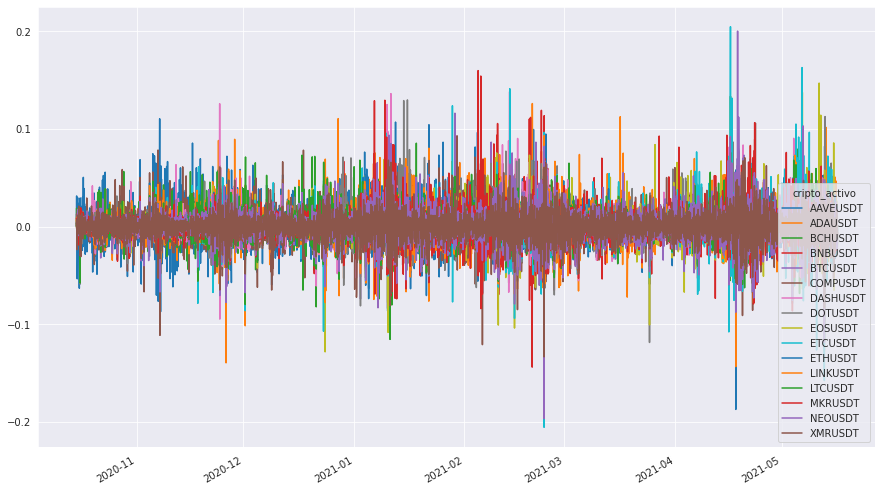

In [123]:
#Evolucion temporal de la tasa de rendimiento logaritmica

fig, axes = plt.subplots(1, 1, figsize=(15, 9), sharex=True)
df_tasalog.plot(ax=axes)

In [124]:
orden_months=[10,11,12,1,2,3,4,5]
seaborn.boxplot(data=df_tasalog, x='Month',hue='Year',y=name,ax=eje, order= orden_months)

    if name!='volume':
       eje.set_xlabel('')
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())    

seaborn.set_style("darkgrid")
seaborn.despine()
plt.xlabel('Meses')

IndentationError: ignored

##2)Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series.



In [ ]:
df_tasalog.describe()

In [ ]:
f,axs=plt.subplots(int(len(cripto_list)/2),2,figsize=(15,2.5*len(cripto_list)))

for cripto in cripto_list:
  indice=cripto_list.index(cripto)
  seaborn.histplot(df_tasalog[cripto],bins=50,ax=axs[int(indice/2)][indice%2])


In [ ]:
f,axs=plt.subplots(1,1,figsize=(15,6))
seaborn.boxplot(data=df_tasalog)

Se observa que las distribuciones tienen una apariencia normal, centrada en 0 y con poca desviación  

In [ ]:
 pd.plotting.scatter_matrix(df_tasalog, diagonal='kde', alpha=0.1, figsize=(16,16))
 print('')

In [ ]:
seaborn.pairplot(df_tasalog, diag_kind="kde")

In [ ]:
#Estudiando correlaciones entre criptos para la variable tasalog
corre = df_tasalog.corr()
#Using Pearson Correlation
plt.figure(figsize=(16,16))

seaborn.heatmap(corre, annot=True, cmap=plt.cm.Reds)
plt.show()

##3) Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

In [ ]:

volatilidad = df_tasalog.rolling('D').std()
volatilidad.plot(figsize=(18, 8));

In [ ]:
 pd.plotting.scatter_matrix(volatilidad, diagonal='kde', alpha=0.1, figsize=(16,16))
 print('')

In [ ]:
#Estudiando correlaciones entre criptos para la volatilidad
corre = volatilidad.corr()
#Using Pearson Correlation
plt.figure(figsize=(16,16))

seaborn.heatmap(corre, annot=True, cmap=plt.cm.Reds)
plt.show()

Se observa en general una correlacion directa entre los cripto activos, pero entre algunos es mucho más marcada que entre otros

In [ ]:
print (corre.max())